#import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns
import plotly.express as px
import pylab as pl

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

#loading and reading dataset file

In [7]:
horse_popln = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/provided/horseasses-population-in-nepal-by-district.csv')
milk_prod = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/provided/milk-animals-and-milk-production-in-nepal-by-district.csv')
net_meat = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/provided/net-meat-production-in-nepal-by-district.csv')
cotton_prod = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/provided/production-of-cotton-in-nepal-by-district.csv')
egg_prod = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/provided/production-of-egg-in-nepal-by-district.csv')
rabbit_popln = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/provided/rabbit-population-in-nepal-by-district.csv')
wool_prod = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/provided/wool-production-in-nepal-by-district.csv')
yak_popln = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/provided/yak-nak-chauri-population-in-nepal-by-district.csv')

In [8]:
dataframes = [horse_popln, milk_prod, net_meat, cotton_prod, egg_prod, rabbit_popln, wool_prod, yak_popln]

In [9]:
#tail
for i, df in enumerate(dataframes, start=1):
    print(f"df{i}:")
    display(df.tail(3))

df1:


,DISTRICT,Horses/Asses
57,DADELDHURA,241
58,FW.REGION,3811
59,Total,55808


df2:


,DISTRICT,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
93,FW.TERAI,47922,68915,51051,62553,113604.0
94,FW. REGION,130595,132257,87936,112438,200374.0
95,NEPAL,1026135,1355384,643806,1210441,NaN


df3:


,DISTRICT,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
93,FW.TERAI,9778,98,2330,829,2388,6,15429
94,FW.REGION,18154,335,6893,985,2734,6,29107
95,NEPAL,175005,2684,65583,23509,55041,237,322059


df4:


,DISTRICT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
1,Banke,27,41,1519
2,Bardiya,10,12,1200
3,NEPAL,143,127,890


df5:


,DISTRICT,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
93,FW.TERAI,463517.8,5350,30411,430,30841
94,FW.REGION,537737.0,6372,40743,504,41247
95,NEPAL,12353515.0,180927,1294166,13906,1308072


df6:


,DISTRICT,Rabbit
52,DOTI,432
53,FW.REGION,1387
54,Total,32213


df7:


,DISTRICT,SHEEPS NO.,SHEEP WOOL PRODUCED
93,FW.TERAI,29220,21710
94,FW.REGION,102571,76314
95,NEPAL,800658,588348


df8:


,DISTRICT,YAK/NAK/CHAURI
32,DARCHULA,422
33,FW.REGION,892
34,Total,68831


In [10]:
#describe
for i, df in enumerate(dataframes, start=1):
    print(f"df{i}:")
    display(df.describe())

df1:


,Horses/Asses
count,60.000000
mean,2790.400000
std,8447.864779
min,12.000000
25%,122.250000
50%,493.000000
75%,1510.250000
max,55808.000000


df2:


,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
count,9.600000e+01,9.600000e+01,96.000000,9.600000e+01,95.000000
mean,4.275562e+04,5.647433e+04,26825.260417,5.043505e+04,58555.189474
std,1.144496e+05,1.508551e+05,71948.998086,1.358044e+05,96696.838132
min,4.520000e+02,0.000000e+00,259.000000,0.000000e+00,259.000000
25%,8.074750e+03,1.020550e+04,4630.750000,9.085000e+03,14179.500000
50%,1.513050e+04,1.954000e+04,8343.500000,1.710250e+04,28027.000000
75%,2.600800e+04,3.674975e+04,15694.000000,3.110500e+04,43324.000000
max,1.026135e+06,1.355384e+06,643806.000000,1.210441e+06,536299.000000


df3:


,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
count,96.00000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,7291.87500,111.833333,2732.625000,979.541667,2293.375000,9.875000,13419.125000
std,19484.37418,314.001598,7245.635676,2713.977477,6645.981822,28.561015,35967.078276
min,0.00000,0.000000,56.000000,1.000000,5.000000,0.000000,78.000000
25%,1438.50000,10.000000,575.000000,114.000000,208.250000,0.000000,2771.000000
50%,2558.00000,31.000000,890.000000,326.000000,489.000000,2.000000,4502.000000
75%,4447.00000,90.750000,1689.500000,711.250000,1615.250000,6.000000,7827.500000
max,175005.00000,2684.000000,65583.000000,23509.000000,55041.000000,237.000000,322059.000000


df4:


,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
count,4.000000,4.000000,4.000000
mean,71.500000,63.500000,1077.250000
std,63.416612,49.332207,359.439726
min,10.000000,12.000000,700.000000
25%,22.750000,33.750000,842.500000
50%,66.500000,57.500000,1045.000000
75%,115.250000,87.250000,1279.750000
max,143.000000,127.000000,1519.000000


df5:


,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
count,9.600000e+01,96.000000,9.600000e+01,96.000000,9.600000e+01
mean,5.147298e+05,7538.625000,5.392358e+04,579.416667,5.450300e+04
std,1.536131e+06,21446.360692,1.650960e+05,1649.968112,1.665308e+05
min,1.488000e+03,3.000000,2.100000e+02,0.000000,2.110000e+02
25%,3.319350e+04,317.750000,3.060750e+03,24.750000,3.099000e+03
50%,1.113675e+05,1422.500000,7.769500e+03,109.500000,7.978500e+03
75%,3.037330e+05,4475.500000,3.172875e+04,326.250000,3.259750e+04
max,1.235352e+07,180927.000000,1.294166e+06,13906.000000,1.308072e+06


df6:


,Rabbit
count,55.000000
mean,1757.072727
std,4684.882317
min,19.000000
25%,179.000000
50%,506.000000
75%,1135.500000
max,32213.000000


df7:


,SHEEPS NO.,SHEEP WOOL PRODUCED
count,96.000000,96.000000
mean,33360.750000,24514.500000
std,94126.278004,69318.271646
min,36.000000,13.000000
25%,2637.500000,1958.750000
50%,9130.500000,6414.500000
75%,26427.250000,19054.500000
max,800658.000000,588348.000000


df8:


,YAK/NAK/CHAURI
count,35.00000
mean,5899.80000
std,12300.08377
min,25.00000
25%,407.00000
50%,1075.00000
75%,5556.00000
max,68831.00000


In [11]:
#missing
for i, df in enumerate(dataframes, start=1):
    print(f"df{i}:")
    display(df.isnull().sum())

df1:


DISTRICT        0
Horses/Asses    0
dtype: int64

df2:


DISTRICT                  0
MILKING  COWS NO.         0
MILKING  BUFFALOES NO.    0
COW MILK                  0
BUFF MILK                 0
TOTAL MILK PRODUCED       1
dtype: int64

df3:


DISTRICT      0
BUFF          0
MUTTON        0
CHEVON        0
PORK          0
CHICKEN       0
DUCK MEAT     0
TOTAL MEAT    0
dtype: int64

df4:


DISTRICT       0
AREA (Ha.)     0
PROD. (Mt.)    0
YIELD Kg/Ha    0
dtype: int64

df5:


DISTRICT       0
LAYING HEN     0
LAYING DUCK    0
HEN EGG        0
DUCK EGG       0
TOTAL EGG      0
dtype: int64

df6:


DISTRICT    0
Rabbit      0
dtype: int64

df7:


DISTRICT               0
SHEEPS NO.             0
SHEEP WOOL PRODUCED    0
dtype: int64

df8:


DISTRICT          0
YAK/NAK/CHAURI    0
dtype: int64

In [12]:
#checking for duplicate values
for i, df in enumerate(dataframes, start=1):
    print(f"df{i}:")
    display(df.duplicated().sum())

df1:


0

df2:


0

df3:


0

df4:


0

df5:


0

df6:


0

df7:


0

df8:


0

#prepping

In [13]:
dataframe = ['horse_popln', 'milk_prod', 'net_meat', 'cotton_prod', 'egg_prod', 'rabbit_popln', 'wool_prod', 'yak_popln']

In [14]:
#columns name is set to lower case for easy and is standard practice in database
for df in dataframes:
    df.columns = df.columns.str.lower()

In [15]:
#the district name is set to all cap for easy read
for df in dataframes:
    df["district"] = df["district"].str.upper()

In [16]:
#column name is displayed to check out up
for df in dataframes:
    print(f"Column Names: ({df.columns})")

Column Names: (Index(['district', 'horses/asses'], dtype='object'))
Column Names: (Index(['district', 'milking  cows no.', 'milking  buffaloes no.', 'cow milk',
       'buff milk', 'total milk produced'],
      dtype='object'))
Column Names: (Index(['district', 'buff', 'mutton', 'chevon', 'pork ', 'chicken', 'duck meat',
       'total meat'],
      dtype='object'))
Column Names: (Index(['district', 'area (ha.)', 'prod. (mt.)', 'yield kg/ha'], dtype='object'))
Column Names: (Index(['district', 'laying hen', 'laying duck', 'hen egg', 'duck egg',
       'total egg'],
      dtype='object'))
Column Names: (Index(['district', 'rabbit'], dtype='object'))
Column Names: (Index(['district', 'sheeps no.', 'sheep wool produced'], dtype='object'))
Column Names: (Index(['district', 'yak/nak/chauri'], dtype='object'))


In [17]:
#the district name caused problem while merging so the name is changed
district_replacements = {
    "SANKHUWASABHA": "SANKHUWASHAVA",
    "TERATHUM": "TERHATHUM",
    "RAMECHAP": "RAMECHHAP",
    "TOTAL": "NEPAL"
}

In [18]:
# applying district replacement
for df in dataframes:
    df["district"].replace(district_replacements, inplace=True)

In [19]:
#removing empty spaces and from district names
for df in dataframes:
    df['district'] = df['district'].str.replace(' ', '')

In [20]:
#checking tail
for i, df in enumerate(dataframes, start=1):
    print(f"df{i}:")
    display(df.tail(3))

df1:


,district,horses/asses
57,DADELDHURA,241
58,FW.REGION,3811
59,NEPAL,55808


df2:


,district,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced
93,FW.TERAI,47922,68915,51051,62553,113604.0
94,FW.REGION,130595,132257,87936,112438,200374.0
95,NEPAL,1026135,1355384,643806,1210441,NaN


df3:


,district,buff,mutton,chevon,pork,chicken,duck meat,total meat
93,FW.TERAI,9778,98,2330,829,2388,6,15429
94,FW.REGION,18154,335,6893,985,2734,6,29107
95,NEPAL,175005,2684,65583,23509,55041,237,322059


df4:


,district,area (ha.),prod. (mt.),yield kg/ha
1,BANKE,27,41,1519
2,BARDIYA,10,12,1200
3,NEPAL,143,127,890


df5:


,district,laying hen,laying duck,hen egg,duck egg,total egg
93,FW.TERAI,463517.8,5350,30411,430,30841
94,FW.REGION,537737.0,6372,40743,504,41247
95,NEPAL,12353515.0,180927,1294166,13906,1308072


df6:


,district,rabbit
52,DOTI,432
53,FW.REGION,1387
54,NEPAL,32213


df7:


,district,sheeps no.,sheep wool produced
93,FW.TERAI,29220,21710
94,FW.REGION,102571,76314
95,NEPAL,800658,588348


df8:


,district,yak/nak/chauri
32,DARCHULA,422
33,FW.REGION,892
34,NEPAL,68831


In [21]:
for df in dataframes:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      60 non-null     object
 1   horses/asses  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                96 non-null     object 
 1   milking  cows no.       96 non-null     int64  
 2   milking  buffaloes no.  96 non-null     int64  
 3   cow milk                96 non-null     int64  
 4   buff milk               96 non-null     int64  
 5   total milk produced     95 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns

#region only dataset

makes it easy to visualize later

In [22]:
def is_district_region(value):
    return value.startswith(('C.', 'E.', 'FW.', 'MW.', 'W.', 'TOTAL', 'NEPAL'))

def filter_regions(df):
    region_df = df[pd.Series([is_district_region(x) for x in df["district"]])].copy()
    district_only_df = df.drop(region_df.index)
    return region_df, district_only_df

region_df_horse, df_horse_district_only = filter_regions(horse_popln)
region_df_milk, df_milk_district_only = filter_regions(milk_prod)
region_df_meat, df_meat_district_only = filter_regions(net_meat)
region_df_cotton, df_cotton_district_only = filter_regions(cotton_prod)
region_df_egg, df_egg_district_only = filter_regions(egg_prod)
region_df_rabbit, df_rabbit_district_only = filter_regions(rabbit_popln)
region_df_wool, df_wool_district_only = filter_regions(wool_prod)
region_df_yak, df_yak_district_only = filter_regions(yak_popln)

all_region = pd.merge(region_df_horse, region_df_milk, on="district", how="outer").fillna(0) \
    .merge(region_df_meat, on="district", how="outer").fillna(0) \
    .merge(region_df_cotton, on="district", how="outer").fillna(0) \
    .merge(region_df_egg, on="district", how="outer").fillna(0) \
    .merge(region_df_rabbit, on="district", how="outer").fillna(0) \
    .merge(region_df_wool, on="district", how="outer").fillna(0) \
    .merge(region_df_yak, on="district", how="outer").fillna(0)

pd.set_option('display.max_columns', None)

In [23]:
all_region.columns

Index(['district', 'horses/asses', 'milking  cows no.',
       'milking  buffaloes no.', 'cow milk', 'buff milk',
       'total milk produced', 'buff', 'mutton', 'chevon', 'pork ', 'chicken',
       'duck meat', 'total meat', 'area (ha.)', 'prod. (mt.)', 'yield kg/ha',
       'laying hen', 'laying duck', 'hen egg', 'duck egg', 'total egg',
       'rabbit', 'sheeps no.', 'sheep wool produced', 'yak/nak/chauri'],
      dtype='object')

In [24]:
#save region csv file to drive for future
csv_filename = "/content/drive/MyDrive/mlpc/csv_files/clean/all_region.csv"
all_region.to_csv(csv_filename, index=False)

# district only data merge

In [25]:
#merging dataframe files with outer join like sql
district_only = pd.merge(df_horse_district_only,df_milk_district_only,on="district",how="outer").fillna(0)\
.merge(df_meat_district_only,on="district",how="outer").fillna(0)\
.merge(df_cotton_district_only,on="district",how="outer").fillna(0)\
.merge(df_egg_district_only,on="district",how="outer").fillna(0)\
.merge(df_rabbit_district_only,on="district",how="outer").fillna(0)\
.merge(df_wool_district_only,on="district",how="outer").fillna(0)\
.merge(df_yak_district_only,on="district",how="outer").fillna(0)
pd.set_option('display.max_columns', None)

In [26]:
district_only.sort_values(by="district", ascending=True)

,district,horses/asses,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced,buff,mutton,chevon,pork,chicken,duck meat,total meat,area (ha.),prod. (mt.),yield kg/ha,laying hen,laying duck,hen egg,duck egg,total egg,rabbit,sheeps no.,sheep wool produced,yak/nak/chauri
50,ACHHAM,95.0,5796,10381,3321,9010,12331.0,1329,10,710,6,47,0,2102,0.0,0.0,0.0,12096.0,143,1905,9,1914,0.0,3085,2400,0.0
28,ARGHAKHANCHI,17.0,6219,27698,3805,25232,29037.0,3246,2,638,42,303,0,4231,0.0,0.0,0.0,77924.0,118,7289,7,7296,152.0,496,369,0.0
26,BAGLUNG,1250.0,8950,22929,5128,18093,23221.0,2124,19,578,109,297,1,3128,0.0,0.0,0.0,57523.0,1370,2199,104,2303,120.0,6851,5090,0.0
52,BAITADI,484.0,9845,12699,4641,10184,14825.0,1727,1,730,12,14,0,2484,0.0,0.0,0.0,3509.0,107,594,6,600,0.0,304,225,0.0
48,BAJHANG,724.0,15936,9679,4600,4149,8749.0,1208,89,572,34,40,0,1943,0.0,0.0,0.0,8917.0,188,985,14,999,148.0,26452,19653,381.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,SYANGJA,17.0,5694,24818,6805,49275,56080.0,3177,40,1129,253,456,3,5058,0.0,0.0,0.0,116948.0,2888,5846,219,6065,384.0,2401,1580,0.0
21,TANAHU,16.0,14942,30798,9678,32272,41950.0,3347,2,752,152,225,1,4479,0.0,0.0,0.0,91121.0,318,14352,24,14376,498.0,548,407,0.0
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,0.0,0.0,0.0,15366.0,341,2420,25,2445,506.0,5777,3519,3465.0
5,TERHATHUM,42.0,18880,13276,10089,11500,21589.0,2358,24,399,486,116,1,3384,0.0,0.0,0.0,26030.0,514,3000,39,3039,206.0,7083,5262,0.0


In [27]:
#save district csv file to drive for future
csv_filename = "/content/drive/MyDrive/mlpc/csv_files/clean/all_district.csv"
district_only.to_csv(csv_filename, index=False)

In [28]:
pd.set_option('display.max_rows', 105)
all_districts=np.sort(district_only["district"].unique())
print(all_districts)
print("Total Disctrict: ",len(all_districts))

['ACHHAM' 'ARGHAKHANCHI' 'BAGLUNG' 'BAITADI' 'BAJHANG' 'BAJURA' 'BANKE'
 'BARA' 'BARDIYA' 'BHAKTAPUR' 'BHOJPUR' 'CHITWAN' 'DADELDHURA' 'DAILEKH'
 'DANG' 'DARCHULA' 'DHADING' 'DHANKUTA' 'DHANUSHA' 'DOLAKHA' 'DOLPA'
 'DOTI' 'GORKHA' 'GULMI' 'HUMLA' 'ILLAM' 'JAJARKOT' 'JHAPA' 'JUMLA'
 'KAILALI' 'KALIKOT' 'KANCHANPUR' 'KAPILBASTU' 'KASKI' 'KATHMANDU' 'KAVRE'
 'KHOTANG' 'LALITPUR' 'LAMJUNG' 'MAHOTTARI' 'MAKWANPUR' 'MANANG' 'MORANG'
 'MUGU' 'MUSTANG' 'MYAGDI' 'NAWALPARASI' 'NUWAKOT' 'OKHALDHUNGA' 'PALPA'
 'PANCHTHAR' 'PARBAT' 'PARSA' 'PYUTHAN' 'RAMECHHAP' 'RASUWA' 'RAUTAHAT'
 'ROLPA' 'RUKUM' 'RUPANDEHI' 'SALYAN' 'SANKHUWASHAVA' 'SAPTARI' 'SARLAHI'
 'SINDHULI' 'SINDHUPALCHOK' 'SIRAHA' 'SOLUKHUMBU' 'SUNSARI' 'SURKHET'
 'SYANGJA' 'TANAHU' 'TAPLEJUNG' 'TERHATHUM' 'UDAYAPUR']
Total Disctrict:  75


#checking dataframe

In [29]:
df_district = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/all_district.csv')
df_region = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/all_region.csv')

In [30]:
display(df_district)

,district,horses/asses,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced,buff,mutton,chevon,pork,chicken,duck meat,total meat,area (ha.),prod. (mt.),yield kg/ha,laying hen,laying duck,hen egg,duck egg,total egg,rabbit,sheeps no.,sheep wool produced,yak/nak/chauri
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,0.0,0.0,0.0,15366.0,341,2420,25,2445,506.0,5777,3519,3465.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457,0.0,0.0,0.0,77512.0,465,5506,34,5540,313.0,12181,9050,3945.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161,0.0,0.0,0.0,42671.0,374,2345,28,2373,105.0,8461,6286,12235.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419,0.0,0.0,0.0,63779.0,261,5581,19,5600,29.0,1338,994,1075.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365,0.0,0.0,0.0,26781.0,332,6656,27,6683,240.0,160,118,165.0
5,TERHATHUM,42.0,18880,13276,10089,11500,21589.0,2358,24,399,486,116,1,3384,0.0,0.0,0.0,26030.0,514,3000,39,3039,206.0,7083,5262,0.0
6,BHOJPUR,168.0,14103,16342,7324,14184,21508.0,1251,51,313,919,251,2,2787,0.0,0.0,0.0,53957.0,1136,4037,88,4125,42.0,18210,13530,887.0
7,KHOTANG,350.0,12998,19501,7105,12275,19380.0,1997,31,442,705,310,1,3486,0.0,0.0,0.0,50271.0,354,4310,27,4337,100.0,9156,5925,350.0
8,OKHALDHUNGA,102.0,7930,11693,4555,5516,10071.0,1497,31,685,751,294,0,3258,0.0,0.0,0.0,59344.0,445,3296,33,3329,645.0,9105,6756,675.0
9,UDAYAPUR,1302.0,15867,26138,9092,22687,31779.0,3346,2,1430,818,578,2,6176,0.0,0.0,0.0,148326.0,1474,50120,116,50236,1217.0,609,452,0.0


In [31]:
df_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                75 non-null     object 
 1   horses/asses            75 non-null     float64
 2   milking  cows no.       75 non-null     int64  
 3   milking  buffaloes no.  75 non-null     int64  
 4   cow milk                75 non-null     int64  
 5   buff milk               75 non-null     int64  
 6   total milk produced     75 non-null     float64
 7   buff                    75 non-null     int64  
 8   mutton                  75 non-null     int64  
 9   chevon                  75 non-null     int64  
 10  pork                    75 non-null     int64  
 11  chicken                 75 non-null     int64  
 12  duck meat               75 non-null     int64  
 13  total meat              75 non-null     int64  
 14  area (ha.)              75 non-null     floa

In [32]:
df_district.shape

(75, 26)

In [33]:
df_district['district'].unique()

array(['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM',
       'TERHATHUM', 'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR',
       'JHAPA', 'MORANG', 'SUNSARI', 'NUWAKOT', 'RAUTAHAT', 'BARA',
       'CHITWAN', 'MANANG', 'MUSTANG', 'GORKHA', 'LAMJUNG', 'TANAHU',
       'KASKI', 'PARBAT', 'SYANGJA', 'MYAGDI', 'BAGLUNG', 'GULMI',
       'ARGHAKHANCHI', 'NAWALPARASI', 'RUPANDEHI', 'KAPILBASTU', 'DOLPA',
       'MUGU', 'JUMLA', 'HUMLA', 'KALIKOT', 'RUKUM', 'ROLPA', 'PYUTHAN',
       'SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'DANG', 'BANKE',
       'BARDIYA', 'BAJURA', 'BAJHANG', 'DARCHULA', 'ACHHAM', 'DOTI',
       'BAITADI', 'DADELDHURA', 'DHANKUTA', 'SAPTARI', 'SIRAHA',
       'DOLAKHA', 'SINDHUPALCHOK', 'RASUWA', 'RAMECHHAP', 'SINDHULI',
       'KAVRE', 'BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'DHADING',
       'MAKWANPUR', 'DHANUSHA', 'MAHOTTARI', 'SARLAHI', 'PARSA', 'PALPA',
       'KAILALI', 'KANCHANPUR'], dtype=object)

In [34]:
df_district.isna().sum()

district                  0
horses/asses              0
milking  cows no.         0
milking  buffaloes no.    0
cow milk                  0
buff milk                 0
total milk produced       0
buff                      0
mutton                    0
chevon                    0
pork                      0
chicken                   0
duck meat                 0
total meat                0
area (ha.)                0
prod. (mt.)               0
yield kg/ha               0
laying hen                0
laying duck               0
hen egg                   0
duck egg                  0
total egg                 0
rabbit                    0
sheeps no.                0
sheep wool produced       0
yak/nak/chauri            0
dtype: int64

In [35]:
df_district.nunique()

district                  75
horses/asses              51
milking  cows no.         75
milking  buffaloes no.    74
cow milk                  75
buff milk                 74
total milk produced       75
buff                      75
mutton                    45
chevon                    73
pork                      68
chicken                   74
duck meat                 15
total meat                75
area (ha.)                 4
prod. (mt.)                4
yield kg/ha                4
laying hen                75
laying duck               72
hen egg                   75
duck egg                  63
total egg                 73
rabbit                    50
sheeps no.                74
sheep wool produced       74
yak/nak/chauri            30
dtype: int64

In [36]:
display(df_region)

,district,horses/asses,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced,buff,mutton,chevon,pork,chicken,duck meat,total meat,area (ha.),prod. (mt.),yield kg/ha,laying hen,laying duck,hen egg,duck egg,total egg,rabbit,sheeps no.,sheep wool produced,yak/nak/chauri
0,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,10195,8811,89,76313,0.0,0.0,0.0,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
1,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,4432,28728,67,100620,0.0,0.0,0.0,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
2,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,4127,9414,65,67183,0.0,0.0,0.0,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
3,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,3770,5354,10,48836,0.0,0.0,0.0,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
4,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,985,2734,6,29107,0.0,0.0,0.0,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0
5,NEPAL,55808.0,1026135,1355384,643806,1210441,0.0,175005,2684,65583,23509,55041,237,322059,143.0,127.0,890.0,12353515.00,180927,1294166,13906,1308072,32213.0,800658,588348,68831.0
6,E.MOUNTAIN,0.0,31284,31855,15324,20339,35663.0,3376,100,1865,1380,640,1,7362,0.0,0.0,0.0,135548.00,1180,10271,87,10358,0.0,26419,18855,0.0
7,E.HILLS,0.0,123976,109431,74587,95837,170424.0,15440,146,5484,5287,2372,9,28738,0.0,0.0,0.0,549366.00,5916,78878,458,79336,0.0,46238,33361,0.0
8,E.TERAI,0.0,177124,150892,106797,147023,253820.0,22404,23,8380,3528,5799,79,40213,0.0,0.0,0.0,1095640.00,53097,125092,4167,129259,0.0,7158,5786,0.0
9,C.MOUNTAIN,0.0,21380,32607,13173,30261,43434.0,4486,85,1821,344,1046,3,7785,0.0,0.0,0.0,232271.00,3423,16482,265,16747,0.0,25100,18649,0.0


In [37]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                21 non-null     object 
 1   horses/asses            21 non-null     float64
 2   milking  cows no.       21 non-null     int64  
 3   milking  buffaloes no.  21 non-null     int64  
 4   cow milk                21 non-null     int64  
 5   buff milk               21 non-null     int64  
 6   total milk produced     21 non-null     float64
 7   buff                    21 non-null     int64  
 8   mutton                  21 non-null     int64  
 9   chevon                  21 non-null     int64  
 10  pork                    21 non-null     int64  
 11  chicken                 21 non-null     int64  
 12  duck meat               21 non-null     int64  
 13  total meat              21 non-null     int64  
 14  area (ha.)              21 non-null     floa

In [38]:
df_region.shape

(21, 26)

In [39]:
df_region.isna().sum()

district                  0
horses/asses              0
milking  cows no.         0
milking  buffaloes no.    0
cow milk                  0
buff milk                 0
total milk produced       0
buff                      0
mutton                    0
chevon                    0
pork                      0
chicken                   0
duck meat                 0
total meat                0
area (ha.)                0
prod. (mt.)               0
yield kg/ha               0
laying hen                0
laying duck               0
hen egg                   0
duck egg                  0
total egg                 0
rabbit                    0
sheeps no.                0
sheep wool produced       0
yak/nak/chauri            0
dtype: int64

In [40]:
df_region.nunique()

district                  21
horses/asses               7
milking  cows no.         21
milking  buffaloes no.    21
cow milk                  21
buff milk                 21
total milk produced       21
buff                      21
mutton                    21
chevon                    21
pork                      21
chicken                   21
duck meat                 16
total meat                21
area (ha.)                 2
prod. (mt.)                2
yield kg/ha                2
laying hen                21
laying duck               21
hen egg                   21
duck egg                  21
total egg                 21
rabbit                     7
sheeps no.                21
sheep wool produced       21
yak/nak/chauri             7
dtype: int64

In [41]:
df_region['district'].unique()

array(['E.REGION', 'C.REGION', 'W.REGION', 'MW.REGION', 'FW.REGION',
       'NEPAL', 'E.MOUNTAIN', 'E.HILLS', 'E.TERAI', 'C.MOUNTAIN',
       'C.HILLS', 'C.TERAI', 'W.MOUNTAIN', 'W.HILLS', 'W.TERAI',
       'MW.MOUNTAIN', 'MW.HILLS', 'MW.TERAI', 'FW.MOUNTAIN', 'FW.HILLS',
       'FW.TERAI'], dtype=object)

#district and province mapping stuff

In [42]:
display(df_district)

,district,horses/asses,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced,buff,mutton,chevon,pork,chicken,duck meat,total meat,area (ha.),prod. (mt.),yield kg/ha,laying hen,laying duck,hen egg,duck egg,total egg,rabbit,sheeps no.,sheep wool produced,yak/nak/chauri
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,0.0,0.0,0.0,15366.0,341,2420,25,2445,506.0,5777,3519,3465.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457,0.0,0.0,0.0,77512.0,465,5506,34,5540,313.0,12181,9050,3945.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161,0.0,0.0,0.0,42671.0,374,2345,28,2373,105.0,8461,6286,12235.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419,0.0,0.0,0.0,63779.0,261,5581,19,5600,29.0,1338,994,1075.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365,0.0,0.0,0.0,26781.0,332,6656,27,6683,240.0,160,118,165.0
5,TERHATHUM,42.0,18880,13276,10089,11500,21589.0,2358,24,399,486,116,1,3384,0.0,0.0,0.0,26030.0,514,3000,39,3039,206.0,7083,5262,0.0
6,BHOJPUR,168.0,14103,16342,7324,14184,21508.0,1251,51,313,919,251,2,2787,0.0,0.0,0.0,53957.0,1136,4037,88,4125,42.0,18210,13530,887.0
7,KHOTANG,350.0,12998,19501,7105,12275,19380.0,1997,31,442,705,310,1,3486,0.0,0.0,0.0,50271.0,354,4310,27,4337,100.0,9156,5925,350.0
8,OKHALDHUNGA,102.0,7930,11693,4555,5516,10071.0,1497,31,685,751,294,0,3258,0.0,0.0,0.0,59344.0,445,3296,33,3329,645.0,9105,6756,675.0
9,UDAYAPUR,1302.0,15867,26138,9092,22687,31779.0,3346,2,1430,818,578,2,6176,0.0,0.0,0.0,148326.0,1474,50120,116,50236,1217.0,609,452,0.0


In [43]:
district_province = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/all_district.csv')

In [44]:
province_districts = {
    '(1) KOSHI': ['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU', 'PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA', 'UDAYAPUR', 'JHAPA', 'MORANG', 'SUNSARI'],
    '(2) MADHESH': ['MAHOTTARI', 'RAUTAHAT', 'DHANUSHA', 'SIRAHA', 'BARA', 'SARLAHI', 'PARSA', 'SAPTARI'],
    '(3) BAGMATI': ['BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT', 'DOLAKHA', 'SINDHUPALCHOK', 'RASUWA', 'RAMECHHAP', 'SINDHULI', 'KAVRE', 'DHADING', 'MAKWANPUR','CHITWAN'],
    '(4) GANDAKI': ['PARBAT', 'NAWALPARASI', 'SYANGJA', 'TANAHU', 'LAMJUNG', 'BAGLUNG', 'KASKI', 'MANANG', 'MUSTANG', 'MYAGDI', 'GORKHA'],
    '(5) LUMBINI': ['PALPA',   'GULMI', 'ARGHAKHANCHI', 'RUKUM', 'PYUTHAN', 'RUPANDEHI', 'KAPILBASTU', 'ROLPA', 'DANG', 'BANKE', 'BARDIYA'],
    '(6) KARNALI': ['SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET','DOLPA', 'MUGU', 'HUMLA', 'JUMLA', 'KALIKOT'],
    '(7) SUDUR PASCHIM': ['BAJURA', 'BAJHANG', 'DARCHULA', 'ACHHAM', 'DOTI', 'BAITADI', 'DADELDHURA', 'KAILALI', 'KANCHANPUR'],
}

In [45]:
#removing province column for new data to add
if 'province' in district_province.columns:
    district_province.drop(columns=['province'], inplace=True)

#placing distircts to province
district_province.insert(1, 'province', '')
district_province['province'] = district_province['district'].map({district: province for province, districts in province_districts.items() for district in districts})
try:
    district_province.drop(index=74, inplace=True)
except:
    print("Column 'province' already exists in the DataFrame.")

In [46]:
csv_filename = "/content/drive/MyDrive/mlpc/csv_files/clean/district_province.csv"
district_province.to_csv(csv_filename, index=False)

In [59]:
district_province=pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/district_province.csv')
display(district_province)

,district,province,horses/asses,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced,buff,mutton,chevon,pork,chicken,duck meat,total meat,area (ha.),prod. (mt.),yield kg/ha,laying hen,laying duck,hen egg,duck egg,total egg,rabbit,sheeps no.,sheep wool produced,yak/nak/chauri
0,TAPLEJUNG,(1) KOSHI,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,0.0,0.0,0.0,15366.0,341,2420,25,2445,506.0,5777,3519,3465.0
1,SANKHUWASHAVA,(1) KOSHI,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457,0.0,0.0,0.0,77512.0,465,5506,34,5540,313.0,12181,9050,3945.0
2,SOLUKHUMBU,(1) KOSHI,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161,0.0,0.0,0.0,42671.0,374,2345,28,2373,105.0,8461,6286,12235.0
3,PANCHTHAR,(1) KOSHI,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419,0.0,0.0,0.0,63779.0,261,5581,19,5600,29.0,1338,994,1075.0
4,ILLAM,(1) KOSHI,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365,0.0,0.0,0.0,26781.0,332,6656,27,6683,240.0,160,118,165.0
5,TERHATHUM,(1) KOSHI,42.0,18880,13276,10089,11500,21589.0,2358,24,399,486,116,1,3384,0.0,0.0,0.0,26030.0,514,3000,39,3039,206.0,7083,5262,0.0
6,BHOJPUR,(1) KOSHI,168.0,14103,16342,7324,14184,21508.0,1251,51,313,919,251,2,2787,0.0,0.0,0.0,53957.0,1136,4037,88,4125,42.0,18210,13530,887.0
7,KHOTANG,(1) KOSHI,350.0,12998,19501,7105,12275,19380.0,1997,31,442,705,310,1,3486,0.0,0.0,0.0,50271.0,354,4310,27,4337,100.0,9156,5925,350.0
8,OKHALDHUNGA,(1) KOSHI,102.0,7930,11693,4555,5516,10071.0,1497,31,685,751,294,0,3258,0.0,0.0,0.0,59344.0,445,3296,33,3329,645.0,9105,6756,675.0
9,UDAYAPUR,(1) KOSHI,1302.0,15867,26138,9092,22687,31779.0,3346,2,1430,818,578,2,6176,0.0,0.0,0.0,148326.0,1474,50120,116,50236,1217.0,609,452,0.0


In [48]:
#info
print(district_province.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                74 non-null     object 
 1   province                74 non-null     object 
 2   horses/asses            74 non-null     float64
 3   milking  cows no.       74 non-null     int64  
 4   milking  buffaloes no.  74 non-null     int64  
 5   cow milk                74 non-null     int64  
 6   buff milk               74 non-null     int64  
 7   total milk produced     74 non-null     float64
 8   buff                    74 non-null     int64  
 9   mutton                  74 non-null     int64  
 10  chevon                  74 non-null     int64  
 11  pork                    74 non-null     int64  
 12  chicken                 74 non-null     int64  
 13  duck meat               74 non-null     int64  
 14  total meat              74 non-null     int6

In [49]:
#describe
display(district_province.describe())

,horses/asses,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced,buff,mutton,chevon,pork,chicken,duck meat,total meat,area (ha.),prod. (mt.),yield kg/ha,laying hen,laying duck,hen egg,duck egg,total egg,rabbit,sheeps no.,sheep wool produced,yak/nak/chauri
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,754.162162,13594.202703,17940.162162,8387.310811,16007.648649,24394.945946,2313.364865,35.905405,874.770270,312.824324,729.135135,3.175676,4269.175676,1.932432,1.716216,46.202703,1.644245e+05,2418.851351,17306.527027,185.824324,17492.351351,435.310811,10712.229730,7870.797297,930.148649
std,1443.603871,9413.255023,12085.791676,6670.821559,12152.432120,17321.920003,1456.584263,42.278000,567.861684,280.271461,1248.697561,5.405117,2901.138220,12.707813,9.850277,236.393970,3.402089e+05,4039.957062,48653.117336,313.109170,48695.522080,698.846857,12600.346592,9361.491574,2178.066761
min,0.000000,452.000000,0.000000,259.000000,0.000000,259.000000,0.000000,0.000000,56.000000,1.000000,5.000000,0.000000,78.000000,0.000000,0.000000,0.000000,1.488000e+03,3.000000,210.000000,0.000000,211.000000,0.000000,36.000000,13.000000,0.000000
25%,0.000000,6644.750000,9146.750000,4267.250000,8505.000000,12768.250000,1252.250000,4.750000,455.250000,109.500000,168.250000,0.000000,2516.250000,0.000000,0.000000,0.000000,2.621775e+04,268.250000,2533.000000,20.000000,2579.250000,0.000000,1224.750000,909.250000,0.000000
50%,148.000000,12760.500000,15750.500000,6896.500000,12435.000000,18933.000000,2134.500000,22.500000,791.000000,245.000000,390.500000,1.000000,3512.500000,0.000000,0.000000,0.000000,7.823100e+04,997.000000,6377.000000,76.500000,6604.500000,139.500000,6707.500000,4983.500000,0.000000
75%,745.750000,16768.250000,25619.750000,10616.250000,23996.500000,34454.750000,3239.750000,50.750000,1160.500000,439.250000,804.750000,3.750000,6054.000000,0.000000,0.000000,0.000000,1.856190e+05,3035.000000,15180.750000,244.500000,15255.750000,523.500000,15892.500000,11808.000000,434.750000
max,6769.000000,56521.000000,48934.000000,37387.000000,65590.000000,83509.000000,5962.000000,240.000000,3352.000000,1115.000000,9810.000000,28.000000,17753.000000,106.000000,74.000000,1519.000000,2.751238e+06,25971.000000,411901.000000,2052.000000,412175.000000,3816.000000,72530.000000,53889.000000,12235.000000


In [50]:
#shape
print(district_province.shape)

(74, 27)


In [55]:
#data type
print(district_province.dtypes)

district                   object
province                   object
horses/asses              float64
milking  cows no.           int64
milking  buffaloes no.      int64
cow milk                    int64
buff milk                   int64
total milk produced       float64
buff                        int64
mutton                      int64
chevon                      int64
pork                        int64
chicken                     int64
duck meat                   int64
total meat                  int64
area (ha.)                float64
prod. (mt.)               float64
yield kg/ha               float64
laying hen                float64
laying duck                 int64
hen egg                     int64
duck egg                    int64
total egg                   int64
rabbit                    float64
sheeps no.                  int64
sheep wool produced         int64
yak/nak/chauri            float64
dtype: object


In [60]:
sorted = district_province.sort_values(by='province')
list_dp = sorted.groupby('province').head(3)[['district', 'province']]
display(list_dp)

,district,province
0,TAPLEJUNG,(1) KOSHI
54,DHANKUTA,(1) KOSHI
12,SUNSARI,(1) KOSHI
71,PARSA,(2) MADHESH
68,DHANUSHA,(2) MADHESH
69,MAHOTTARI,(2) MADHESH
63,BHAKTAPUR,(3) BAGMATI
64,LALITPUR,(3) BAGMATI
65,KATHMANDU,(3) BAGMATI
19,GORKHA,(4) GANDAKI


#correlation matrix

In [61]:
district_corr = df_district.corr()
display(district_corr)

<ipython-input-61-a37bfc0d350b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  district_corr = df_district.corr()


,horses/asses,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced,buff,mutton,chevon,pork,chicken,duck meat,total meat,area (ha.),prod. (mt.),yield kg/ha,laying hen,laying duck,hen egg,duck egg,total egg,rabbit,sheeps no.,sheep wool produced,yak/nak/chauri
horses/asses,1.000000,-0.279463,-0.322407,-0.285381,-0.318752,-0.333573,-0.391602,0.663637,-0.274711,-0.236362,-0.211937,-0.227930,-0.355657,0.029650,0.094356,0.174986,-0.179318,-0.199555,-0.131001,-0.203148,-0.132193,0.091906,0.681722,0.683817,0.312543
milking cows no.,-0.279463,1.000000,0.568883,0.902348,0.540606,0.729867,0.711038,-0.270036,0.607954,0.503541,0.244728,0.676762,0.628162,0.063592,0.060166,0.041336,0.187321,0.668618,0.133355,0.683424,0.137634,-0.039467,-0.255380,-0.258608,-0.290556
milking buffaloes no.,-0.322407,0.568883,1.000000,0.565044,0.777311,0.762105,0.860135,-0.169038,0.632476,0.327530,0.290638,0.495733,0.712020,0.182173,0.215723,0.234004,0.237565,0.509672,0.135579,0.506436,0.138717,-0.001810,-0.213361,-0.224044,-0.322232
cow milk,-0.285381,0.902348,0.565044,1.000000,0.664886,0.854584,0.779079,-0.278308,0.584429,0.480617,0.360445,0.618412,0.705138,0.028246,0.029337,0.035278,0.309148,0.616640,0.230890,0.633195,0.234761,-0.056182,-0.286733,-0.291490,-0.303395
buff milk,-0.318752,0.540606,0.777311,0.664886,1.000000,0.956100,0.828175,-0.264192,0.602445,0.331889,0.407543,0.465554,0.739227,0.063677,0.101656,0.180229,0.403541,0.422742,0.284940,0.427796,0.287442,0.036466,-0.325362,-0.332385,-0.354898
total milk produced,-0.333573,0.729867,0.762105,0.854584,0.956100,1.000000,0.881438,-0.292865,0.648134,0.419302,0.424755,0.566292,0.790589,0.055353,0.082186,0.139145,0.401847,0.535832,0.288688,0.545841,0.291946,0.003312,-0.338699,-0.345448,-0.365772
buff,-0.391602,0.711038,0.860135,0.779079,0.828175,0.881438,1.000000,-0.250610,0.721056,0.464644,0.527985,0.637701,0.914056,0.117570,0.130349,0.138567,0.479426,0.558661,0.399311,0.570969,0.402634,0.046211,-0.293950,-0.301230,-0.364949
mutton,0.663637,-0.270036,-0.169038,-0.278308,-0.264192,-0.292865,-0.250610,1.000000,-0.187381,-0.177442,-0.143979,-0.162199,-0.227641,0.218067,0.200784,0.087595,-0.117918,-0.191762,-0.100732,-0.199070,-0.101925,0.081556,0.967302,0.966662,0.212044
chevon,-0.274711,0.607954,0.632476,0.584429,0.602445,0.648134,0.721056,-0.187381,1.000000,0.411703,0.392021,0.496475,0.765010,0.555065,0.552914,0.405594,0.342484,0.466250,0.327792,0.482623,0.330610,0.066623,-0.193256,-0.197802,-0.318184
pork,-0.236362,0.503541,0.327530,0.480617,0.331889,0.419302,0.464644,-0.177442,0.411703,1.000000,0.258450,0.436042,0.520238,0.192203,0.214158,0.222657,0.227272,0.270870,0.220708,0.278944,0.222309,0.132487,-0.196362,-0.196472,-0.143449


In [62]:
region_corr = df_region.corr()
display(region_corr)

<ipython-input-62-e71be26d429d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  region_corr = df_region.corr()


,horses/asses,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced,buff,mutton,chevon,pork,chicken,duck meat,total meat,area (ha.),prod. (mt.),yield kg/ha,laying hen,laying duck,hen egg,duck egg,total egg,rabbit,sheeps no.,sheep wool produced,yak/nak/chauri
horses/asses,1.000000,0.833400,0.842561,0.819064,0.822142,-0.070710,0.834026,0.949054,0.875670,0.819323,0.724412,0.727400,0.833530,0.829530,0.829530,0.829530,0.697285,0.749926,0.687304,0.748740,0.688717,0.953906,0.953798,0.953482,0.913072
milking cows no.,0.833400,1.000000,0.979449,0.997945,0.976201,0.093213,0.986220,0.840149,0.987704,0.976157,0.924303,0.954207,0.986796,0.925626,0.925626,0.925626,0.900989,0.957319,0.896652,0.958914,0.898317,0.923759,0.833913,0.831546,0.958400
milking buffaloes no.,0.842561,0.979449,1.000000,0.983090,0.998655,0.111321,0.998839,0.867759,0.992690,0.949814,0.945790,0.945143,0.996863,0.928014,0.928014,0.928014,0.921884,0.957101,0.911442,0.955120,0.912938,0.945027,0.855922,0.852741,0.954099
cow milk,0.819064,0.997945,0.983090,1.000000,0.981379,0.107023,0.989969,0.828890,0.986786,0.969155,0.936298,0.957982,0.990246,0.924336,0.924336,0.924336,0.914428,0.961236,0.910032,0.962643,0.911616,0.918407,0.821060,0.818494,0.951284
buff milk,0.822142,0.976201,0.998655,0.981379,1.000000,0.135231,0.998048,0.851888,0.987347,0.946259,0.950822,0.949584,0.995892,0.919128,0.919128,0.919128,0.927558,0.958837,0.916508,0.956580,0.917975,0.932979,0.838020,0.834853,0.944498
total milk produced,-0.070710,0.093213,0.111321,0.107023,0.135231,1.000000,0.118367,-0.131847,0.072571,0.118628,0.198435,0.209505,0.123633,-0.260806,-0.260806,-0.260806,0.205564,0.181400,0.210367,0.181082,0.210319,0.024817,-0.147546,-0.149157,0.071192
buff,0.834026,0.986220,0.998839,0.989969,0.998048,0.118367,1.000000,0.856674,0.993420,0.955717,0.949548,0.953176,0.998695,0.927250,0.927250,0.927250,0.926804,0.961872,0.918342,0.960732,0.919834,0.938277,0.845451,0.842456,0.953488
mutton,0.949054,0.840149,0.867759,0.828890,0.851888,-0.131847,0.856674,1.000000,0.885767,0.819650,0.746872,0.735811,0.852482,0.875307,0.875307,0.875307,0.718076,0.759274,0.702383,0.755217,0.703728,0.942293,0.998379,0.997989,0.900978
chevon,0.875670,0.987704,0.992690,0.986786,0.987347,0.072571,0.993420,0.885767,1.000000,0.959812,0.933096,0.938783,0.993947,0.936894,0.936894,0.936894,0.910835,0.947933,0.904874,0.947797,0.906355,0.955860,0.878803,0.876443,0.967559
pork,0.819323,0.976157,0.949814,0.969155,0.946259,0.118628,0.955717,0.819650,0.959812,1.000000,0.861264,0.934221,0.954560,0.887009,0.887009,0.887009,0.832994,0.931210,0.831474,0.931475,0.833439,0.901096,0.811275,0.808575,0.950853


In [63]:
df_region.columns

Index(['district', 'horses/asses', 'milking  cows no.',
       'milking  buffaloes no.', 'cow milk', 'buff milk',
       'total milk produced', 'buff', 'mutton', 'chevon', 'pork ', 'chicken',
       'duck meat', 'total meat', 'area (ha.)', 'prod. (mt.)', 'yield kg/ha',
       'laying hen', 'laying duck', 'hen egg', 'duck egg', 'total egg',
       'rabbit', 'sheeps no.', 'sheep wool produced', 'yak/nak/chauri'],
      dtype='object')

In [64]:
#meat production
meat_corr = ['buff', 'mutton', 'chevon', 'pork ', 'chicken', 'duck meat', 'total meat']
meat_df = df_district[meat_corr]
meat_matrix = meat_df.corr()
#milk production
milk_corr = ['milking  cows no.', 'milking  buffaloes no.', 'cow milk', 'buff milk', 'total milk produced']
milk_df = df_district[milk_corr]
milk_matrix = milk_df.corr()
#egg production
egg_corr = ['laying hen', 'laying duck', 'hen egg', 'duck egg', 'total egg']
egg_df = df_district[egg_corr]
egg_matrix = egg_df.corr()
#wool production
wool_corr = ['sheeps no.', 'sheep wool produced']
wool_df = df_district[wool_corr]
wool_matrix = wool_df.corr()
#dotton production
cotton_corr = ['area (ha.)', 'prod. (mt.)', 'yield kg/ha']
cotton_df = df_district[cotton_corr]
cotton_matrix = cotton_df.corr()

print("Meat Correlation Matrix:")
display(meat_matrix)
print("Milk Correlation Matrix:")
display(milk_matrix)
print("Egg Correlation Matrix:")
display(egg_matrix)
print("Wool Correlation Matrix:")
display(wool_matrix)
print("Cotton Correlation Matrix:")
display(cotton_matrix)

Meat Correlation Matrix:


,buff,mutton,chevon,pork,chicken,duck meat,total meat
buff,1.000000,-0.250610,0.721056,0.464644,0.527985,0.637701,0.914056
mutton,-0.250610,1.000000,-0.187381,-0.177442,-0.143979,-0.162199,-0.227641
chevon,0.721056,-0.187381,1.000000,0.411703,0.392021,0.496475,0.765010
pork,0.464644,-0.177442,0.411703,1.000000,0.258450,0.436042,0.520238
chicken,0.527985,-0.143979,0.392021,0.258450,1.000000,0.417200,0.795792
duck meat,0.637701,-0.162199,0.496475,0.436042,0.417200,1.000000,0.639154
total meat,0.914056,-0.227641,0.765010,0.520238,0.795792,0.639154,1.000000


Milk Correlation Matrix:


,milking cows no.,milking buffaloes no.,cow milk,buff milk,total milk produced
milking cows no.,1.000000,0.568883,0.902348,0.540606,0.729867
milking buffaloes no.,0.568883,1.000000,0.565044,0.777311,0.762105
cow milk,0.902348,0.565044,1.000000,0.664886,0.854584
buff milk,0.540606,0.777311,0.664886,1.000000,0.956100
total milk produced,0.729867,0.762105,0.854584,0.956100,1.000000


Egg Correlation Matrix:


,laying hen,laying duck,hen egg,duck egg,total egg
laying hen,1.000000,0.153292,0.957933,0.192341,0.958335
laying duck,0.153292,1.000000,0.089806,0.997548,0.096142
hen egg,0.957933,0.089806,1.000000,0.132363,0.999980
duck egg,0.192341,0.997548,0.132363,1.000000,0.138678
total egg,0.958335,0.096142,0.999980,0.138678,1.000000


Wool Correlation Matrix:


,sheeps no.,sheep wool produced
sheeps no.,1.000000,0.999099
sheep wool produced,0.999099,1.000000


Cotton Correlation Matrix:


,area (ha.),prod. (mt.),yield kg/ha
area (ha.),1.000000,0.965840,0.550144
prod. (mt.),0.965840,1.000000,0.721437
yield kg/ha,0.550144,0.721437,1.000000


In [65]:
def corr_strength(corr_coeff):
    if 0 <= corr_coeff < 0.2:
        return "weak"
    elif 0.2 <= corr_coeff < 0.5:
        return "moderate"
    elif 0.5 <= corr_coeff < 0.8:
        return "strong"
    elif 0.8 <= corr_coeff <= 1:
        return "very strong"
    else:
        return "no/negative correlation"

def print_strength(correlation_matrix):
    for i, attr1 in enumerate(correlation_matrix.index):
        for j, attr2 in enumerate(correlation_matrix.columns):
            if j > i:
                corr_coeff = correlation_matrix.iloc[i, j]
                strength = corr_strength(corr_coeff)
                print(f"{attr1} and {attr2}:")
                print(f"Correlation Coefficient: {corr_coeff}")
                print(f"Correlation Strenth: {strength}")
                print()

print_strength(meat_matrix)
print('____________________________________________________________')
print_strength(milk_matrix)
print('____________________________________________________________')
print_strength(egg_matrix)
print('____________________________________________________________')
print_strength(wool_matrix)
print('____________________________________________________________')
print_strength(cotton_matrix)

buff and mutton:
Correlation Coefficient: -0.2506103766914132
Correlation Strenth: no/negative correlation

buff and chevon:
Correlation Coefficient: 0.7210555476794281
Correlation Strenth: strong

buff and pork :
Correlation Coefficient: 0.46464368289790337
Correlation Strenth: moderate

buff and chicken:
Correlation Coefficient: 0.5279851192805366
Correlation Strenth: strong

buff and duck meat:
Correlation Coefficient: 0.6377010409417128
Correlation Strenth: strong

buff and total meat:
Correlation Coefficient: 0.9140558069061987
Correlation Strenth: very strong

mutton and chevon:
Correlation Coefficient: -0.18738075419816405
Correlation Strenth: no/negative correlation

mutton and pork :
Correlation Coefficient: -0.17744198187186502
Correlation Strenth: no/negative correlation

mutton and chicken:
Correlation Coefficient: -0.14397870303141944
Correlation Strenth: no/negative correlation

mutton and duck meat:
Correlation Coefficient: -0.1621987289599883
Correlation Strenth: no/neg

#visualization

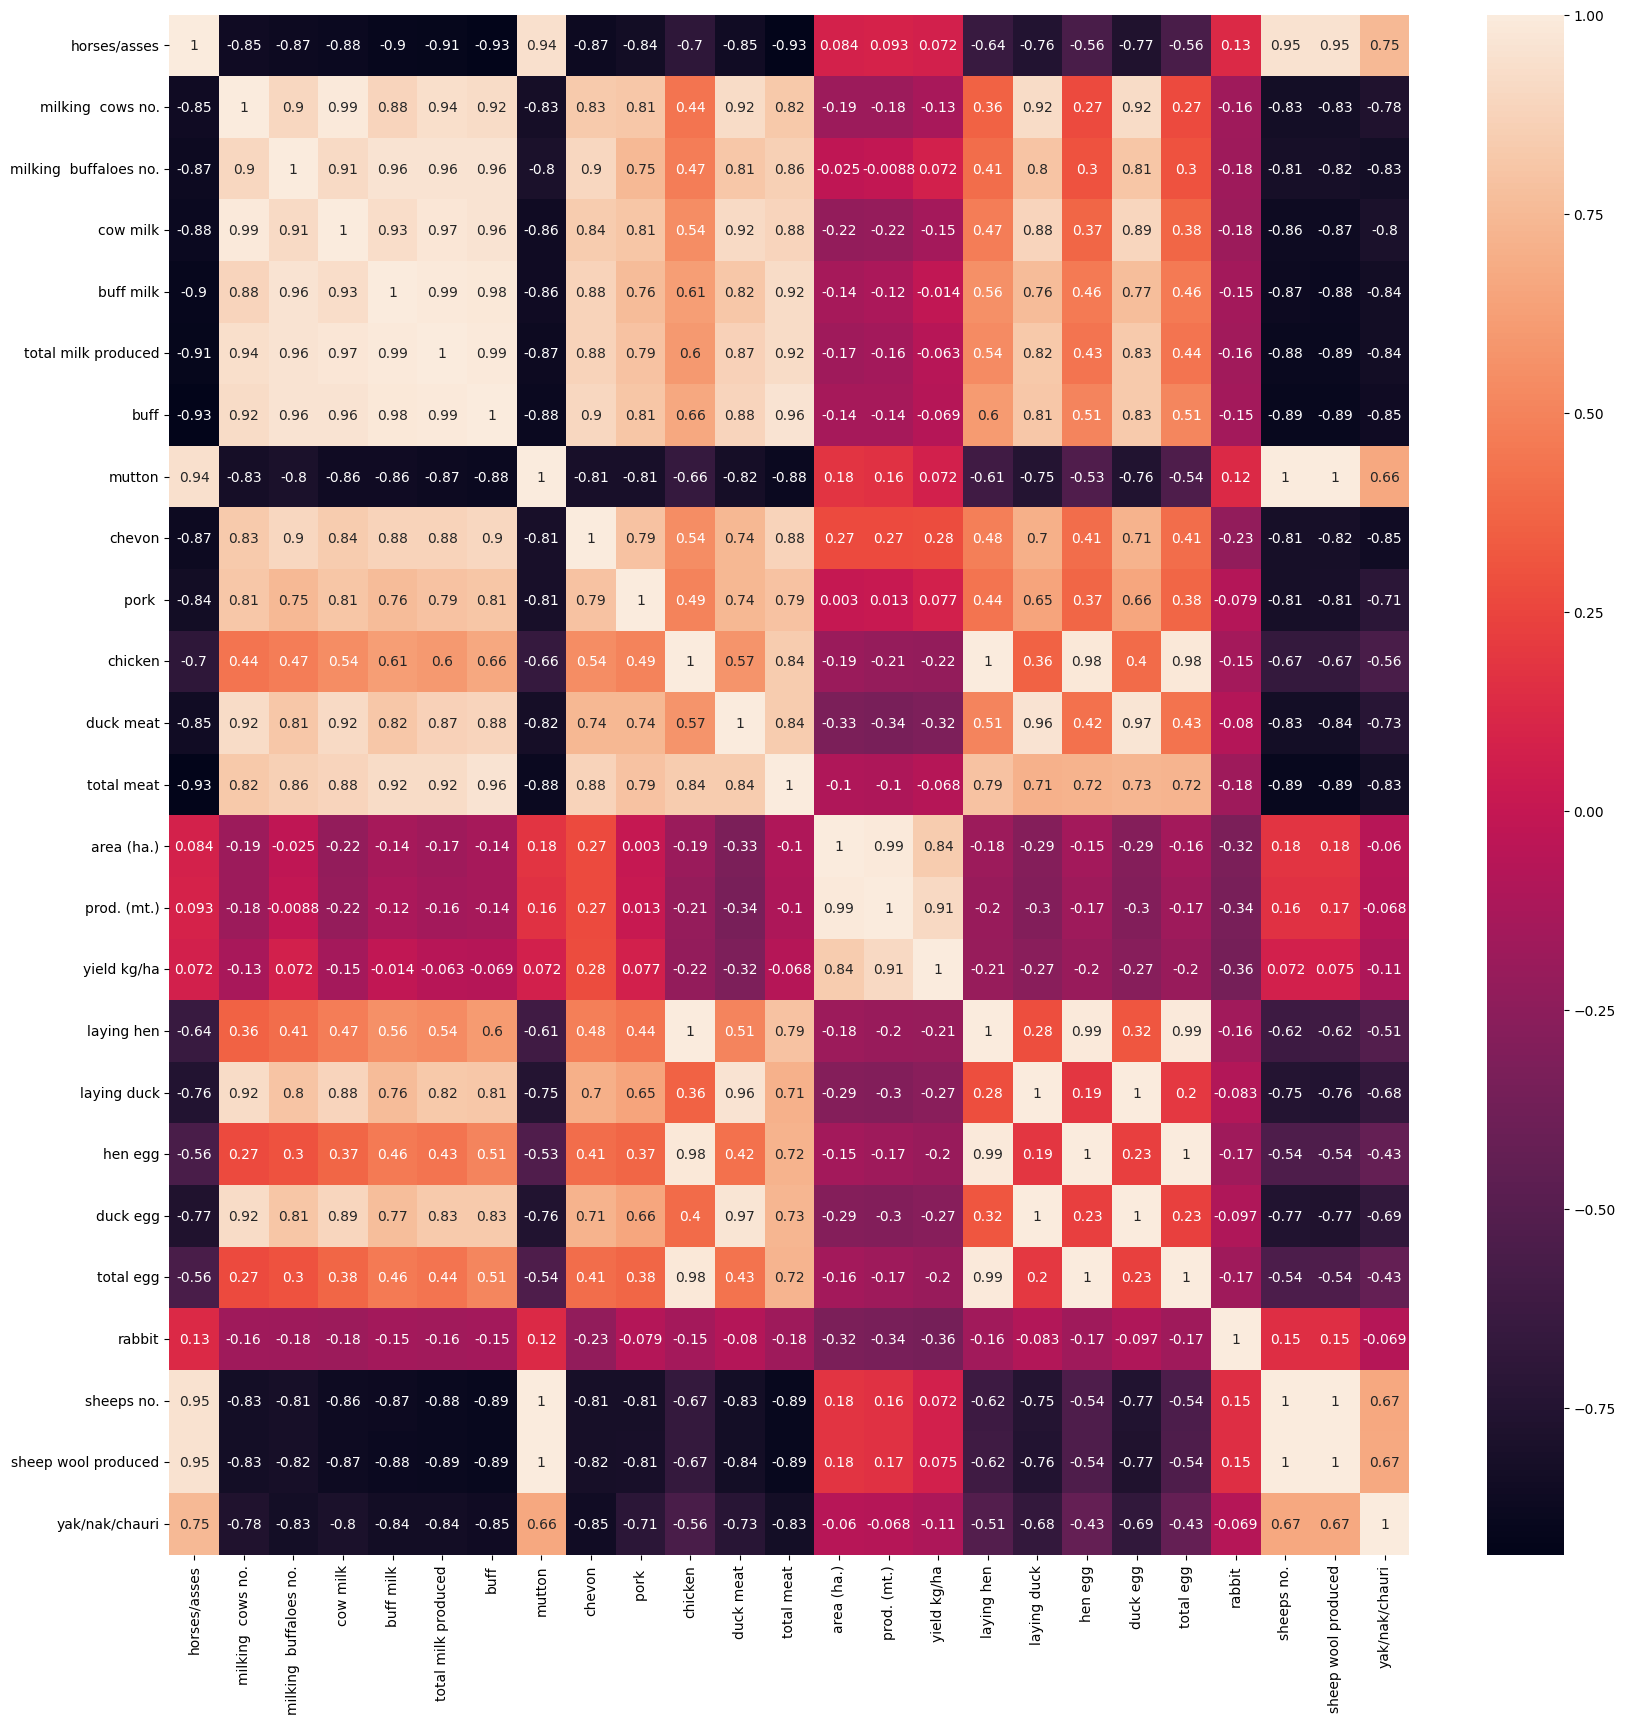

In [67]:
sns.heatmap(district_corr.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20,20)

plt.show()

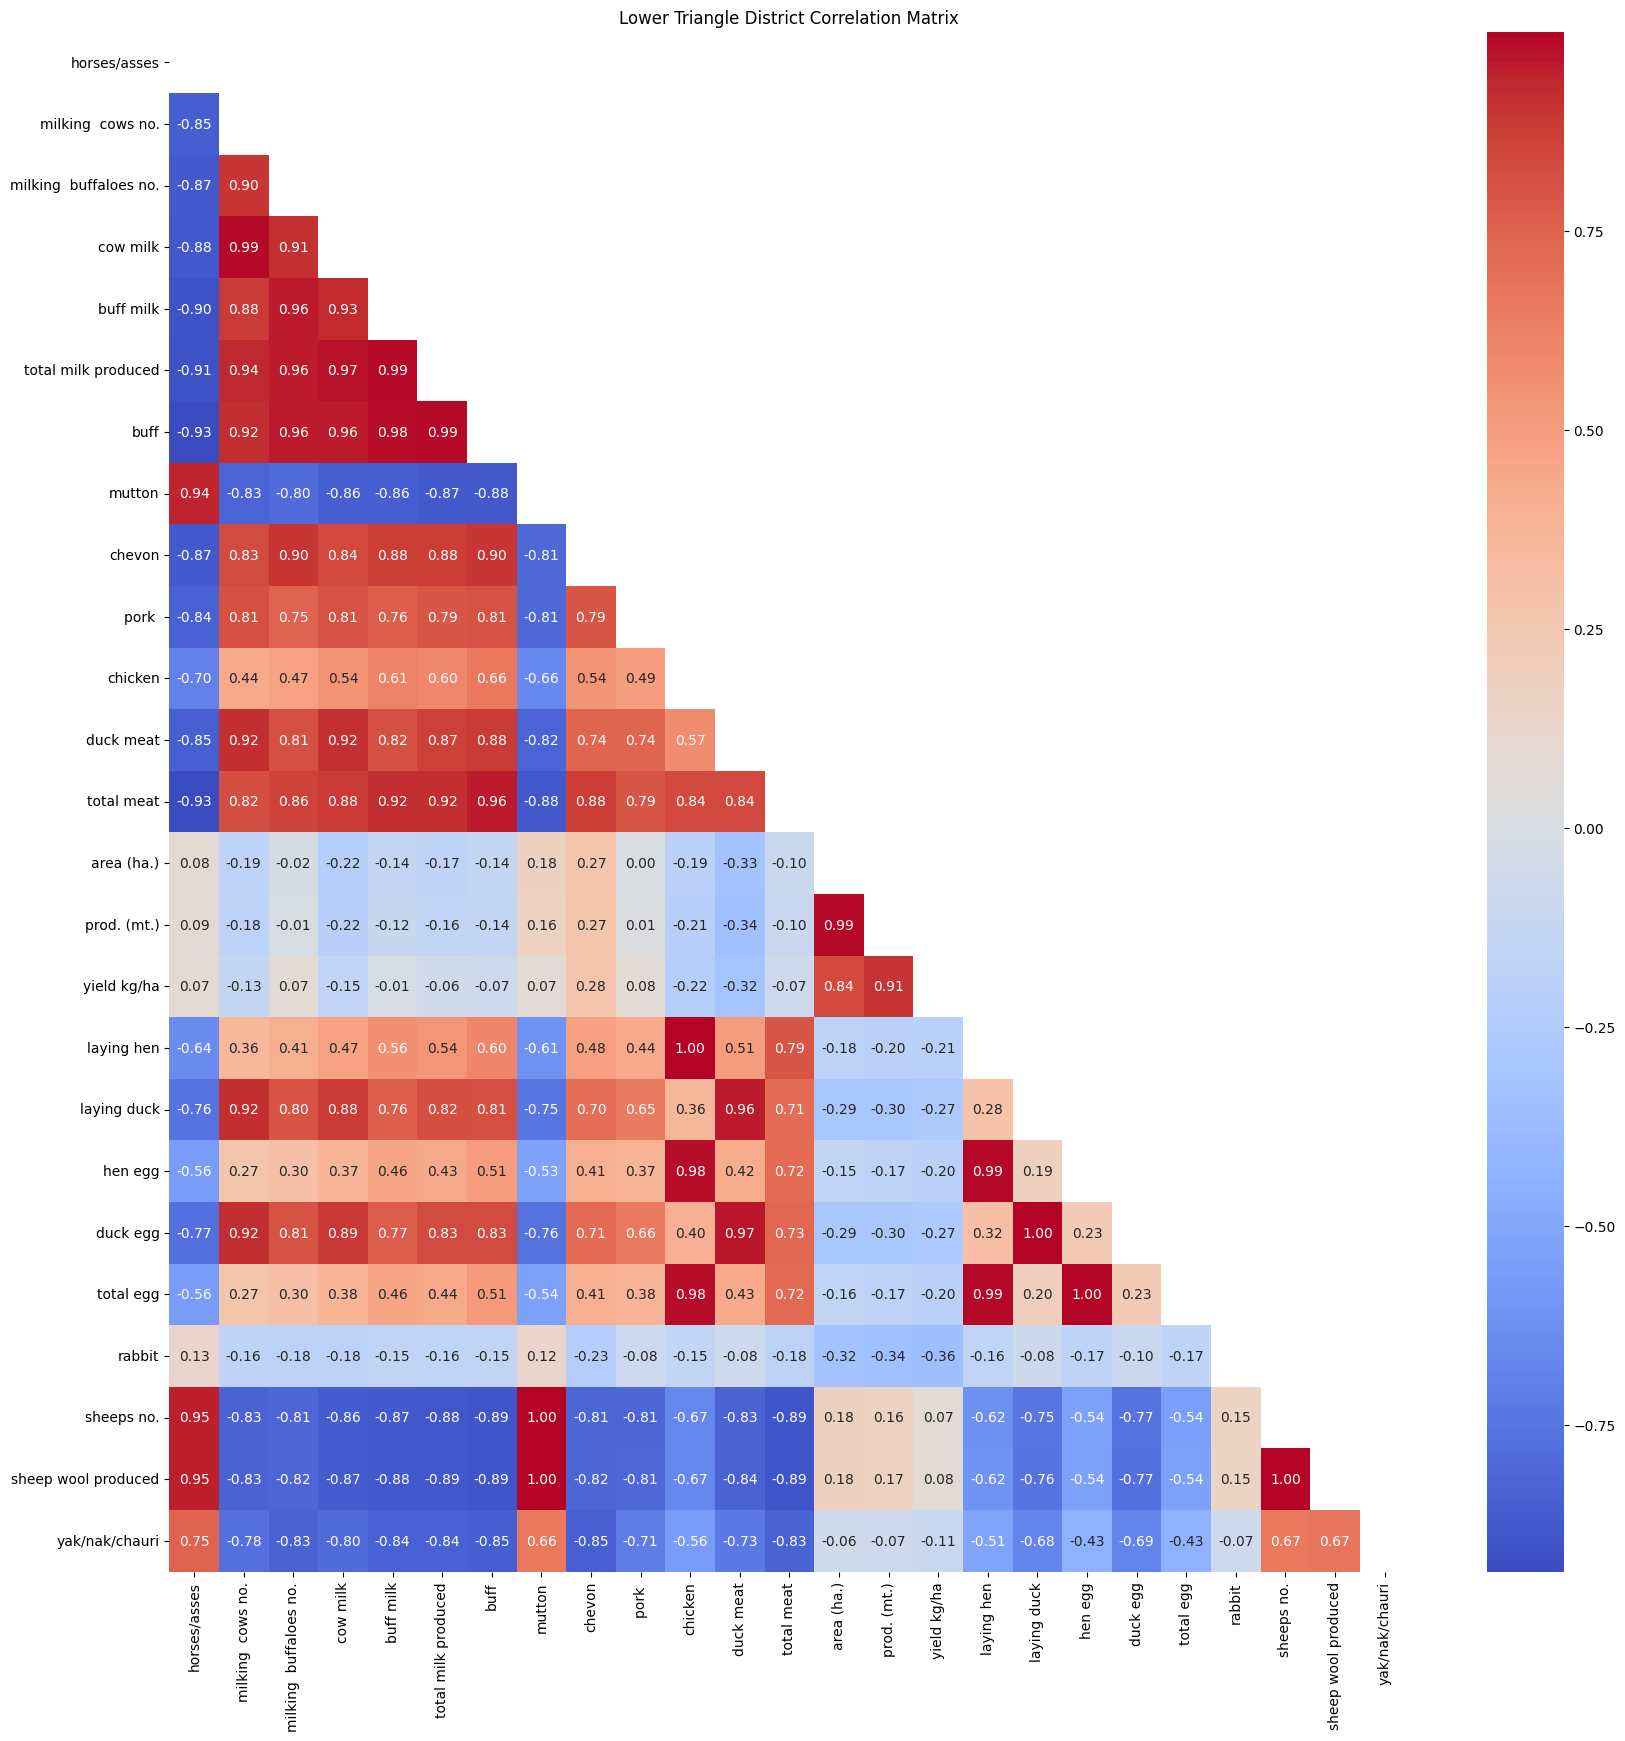

In [68]:
#half heatmap - traingle
district_corr_matrix = district_corr.corr()
mask = np.triu(np.ones_like(district_corr_matrix, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(district_corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f")
plt.title('Lower Triangle District Correlation Matrix')
plt.show()

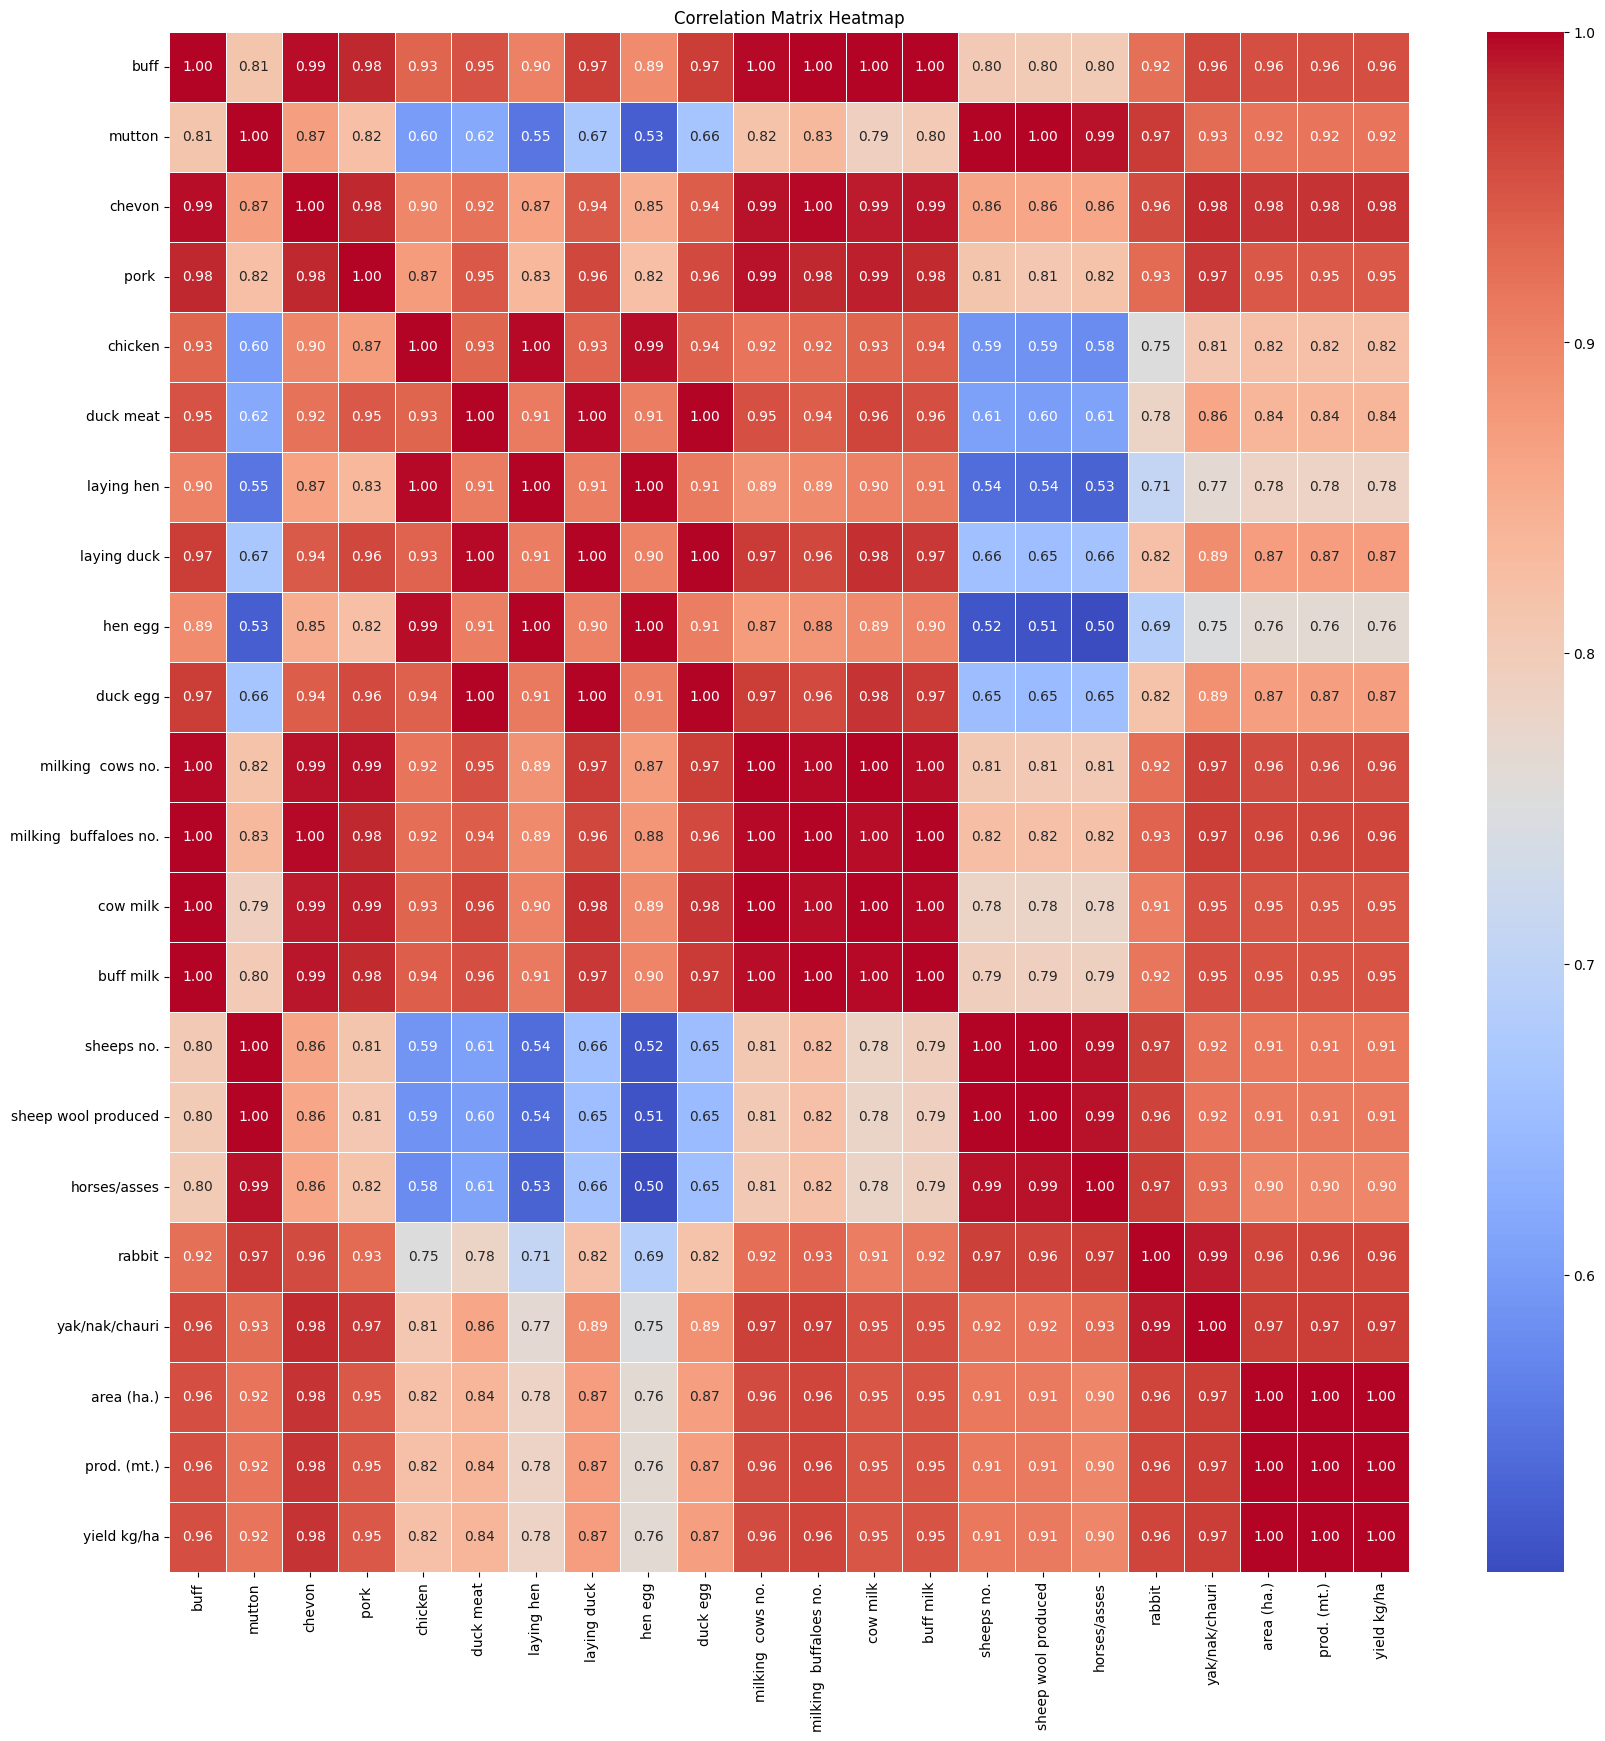

In [69]:
#region correlation matrix
heatmap_data = region_corr[['buff', 'mutton', 'chevon', 'pork ', 'chicken', 'duck meat', 'laying hen', 'laying duck', 'hen egg', 'duck egg', 'milking  cows no.', 'milking  buffaloes no.', 'cow milk', 'buff milk',
                           'sheeps no.', 'sheep wool produced', 'horses/asses', 'rabbit', 'yak/nak/chauri', 'area (ha.)', 'prod. (mt.)', 'yield kg/ha']]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

Text(0.5, 1.0, 'Bar Diagram of total milk producted on different Regions of Nepal')

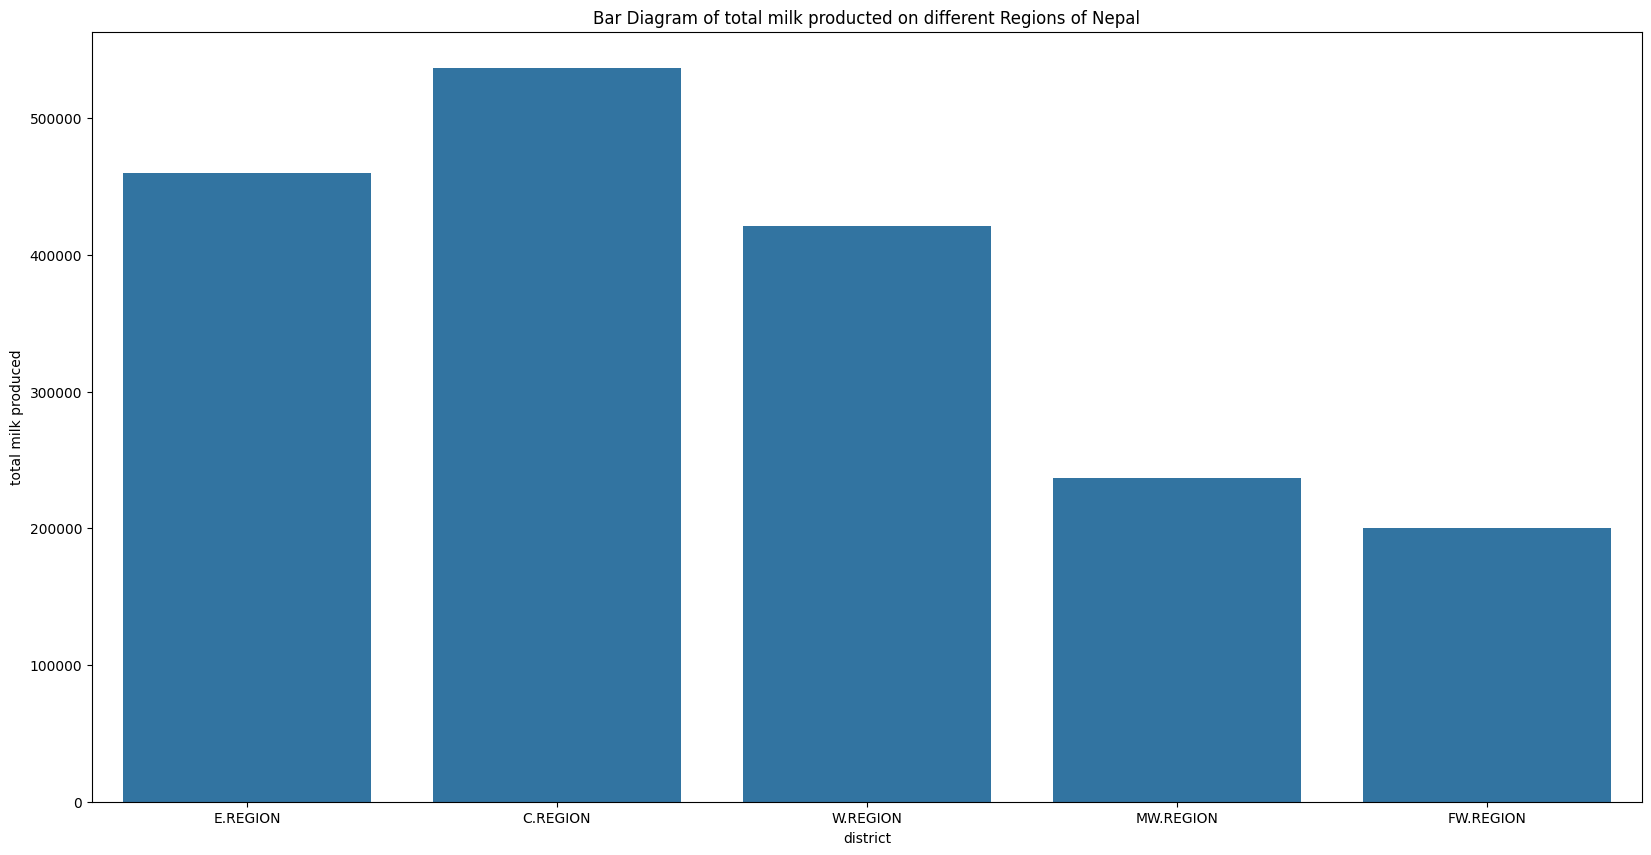

In [70]:
#bar diagram
plt.figure(figsize=(20,10))
regions=["E.REGION","C.REGION","W.REGION","MW.REGION","FW.REGION"]
bar_plot=sns.barplot(x="district", y="total milk produced", data=all_region,order=regions)
bar_plot.set_title("Bar Diagram of total milk producted on different Regions of Nepal")

<ipython-input-71-62c1a7f94429>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_data.loc[:, 'district'] = pie_data['district'].str.replace('NEPAL', '', case=False)


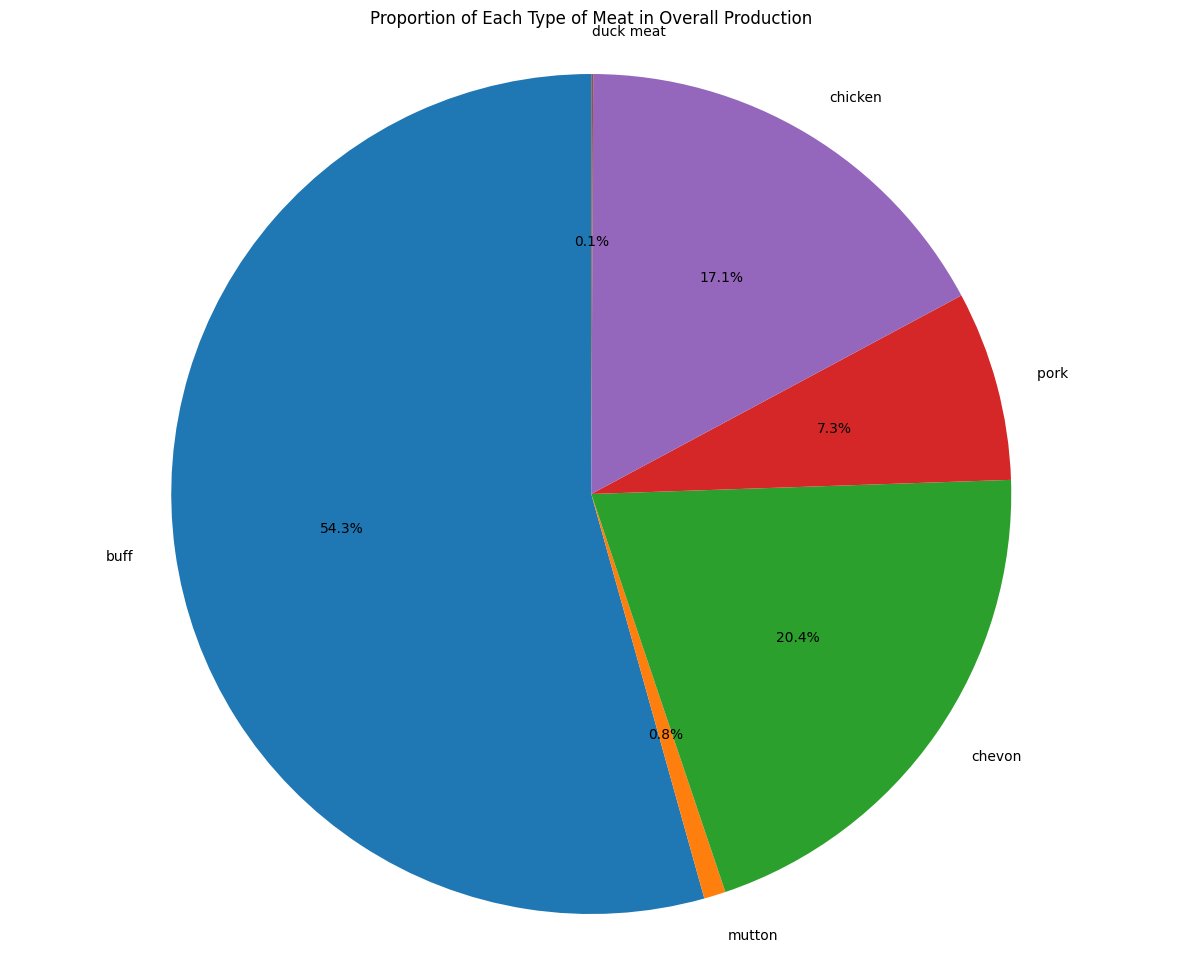

In [71]:
#pie chart of meat
meat_types = ['buff', 'mutton', 'chevon', 'pork ', 'chicken', 'duck meat']

pie_data = df_region[['district'] + meat_types]

pie_data.loc[:, 'district'] = pie_data['district'].str.replace('NEPAL', '', case=False)

total_production = pie_data[meat_types].sum()

plt.figure(figsize=(15, 12))
plt.pie(total_production, labels=meat_types, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Each Type of Meat in Overall Production')
plt.axis('equal')
plt.show()

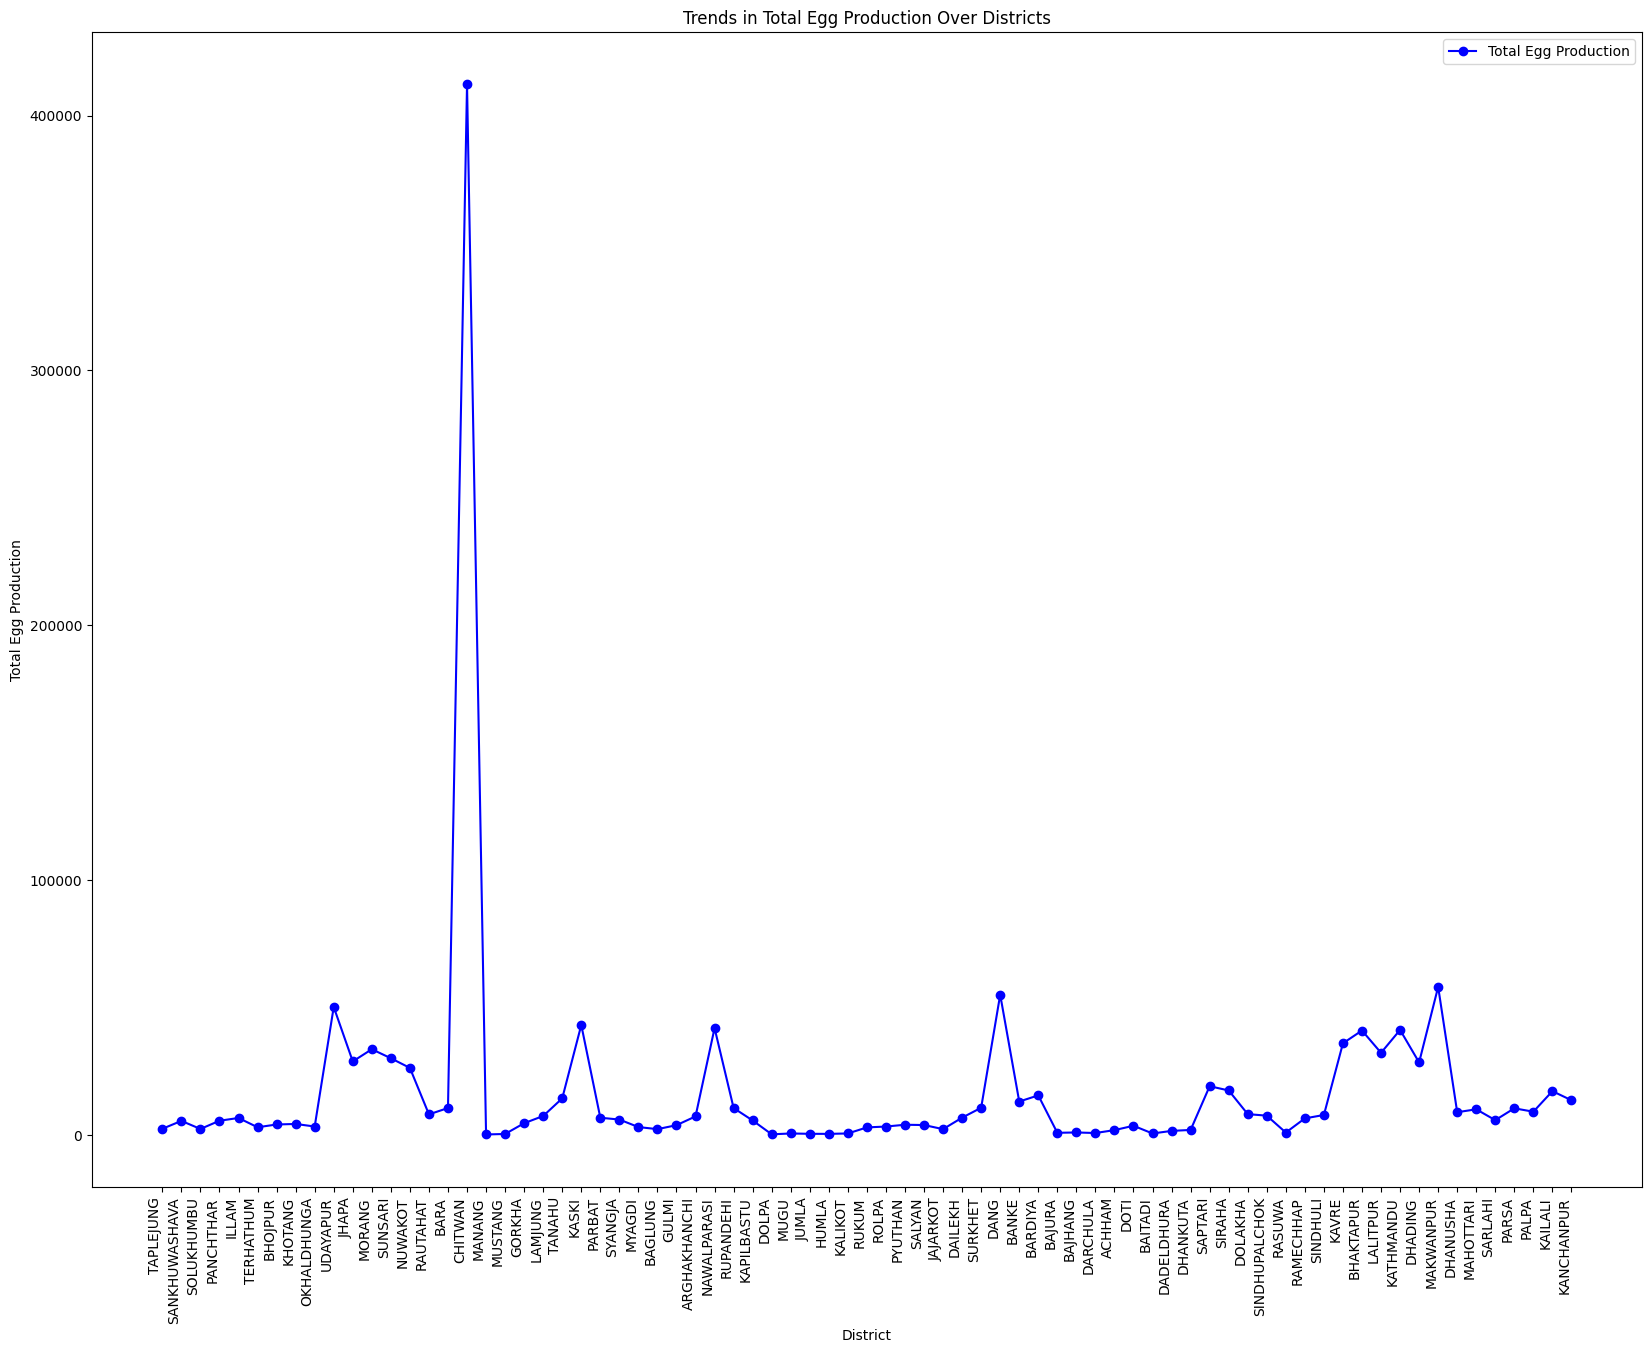

In [72]:
#line graph
line_data = district_only[['district', 'total egg', 'laying hen', 'laying duck', 'hen egg', 'duck egg']]

filtered_data = line_data[~line_data['district'].str.lower().str.contains('total|nepal')]

plt.figure(figsize=(20, 15))
plt.plot(filtered_data['district'], filtered_data['total egg'], marker='o', label='Total Egg Production', color='blue')
plt.title('Trends in Total Egg Production Over Districts')
plt.xlabel('District')
plt.ylabel('Total Egg Production')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

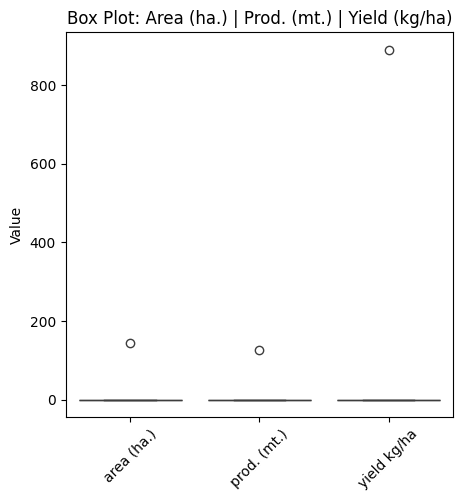

In [73]:
#box plot
boxplot_data = df_region[['district', 'area (ha.)', 'prod. (mt.)', 'yield kg/ha']]
filtered_data = boxplot_data[~boxplot_data['district'].str.lower().str.contains('total|nepal')]

plt.figure(figsize=(5,5))
sns.boxplot(data=boxplot_data)
plt.title('Box Plot: Area (ha.) | Prod. (mt.) | Yield (kg/ha)')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Scatter Plot between Total Milk Produced And Total number of Buff & Cows')

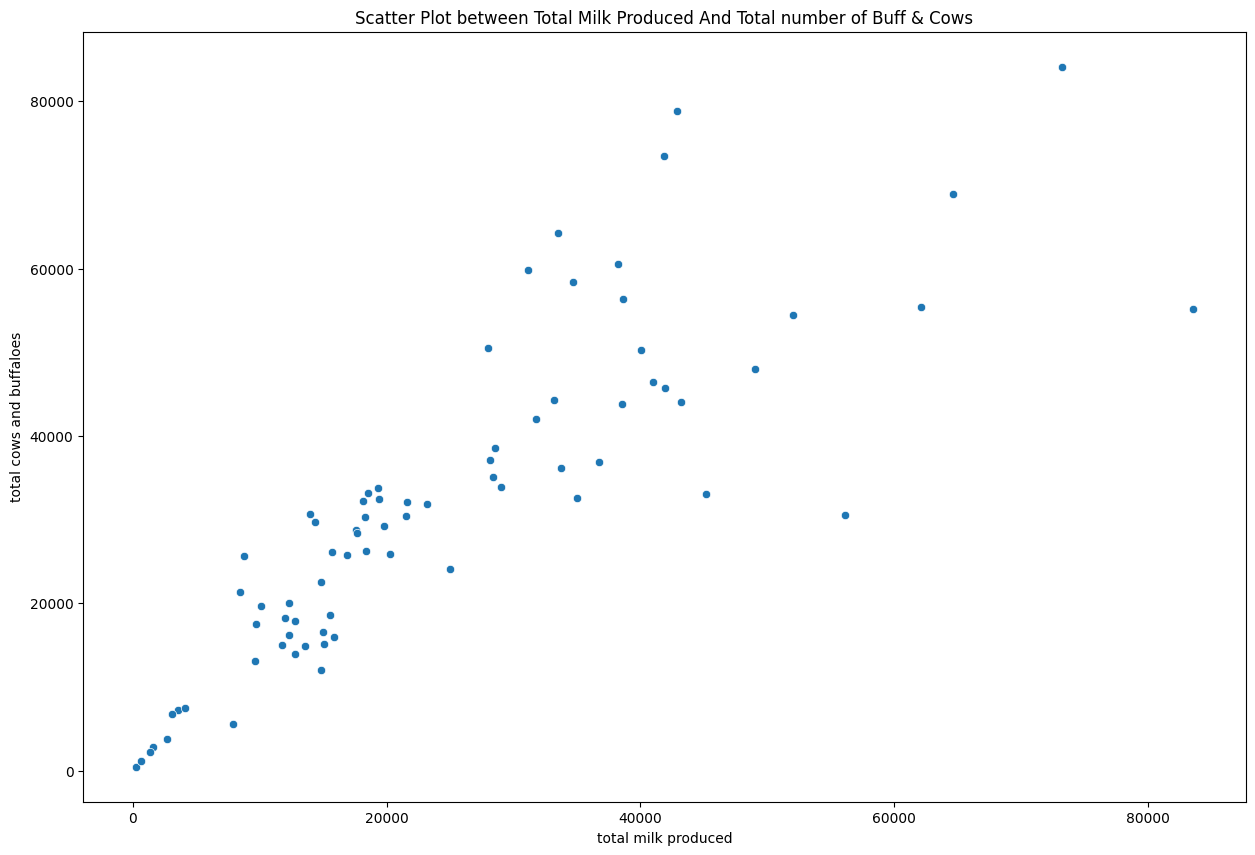

In [74]:
#scatter diagram
df_district["total cows and buffaloes"] = df_district["milking  cows no."] + df_district["milking  buffaloes no."]
plt.figure(figsize=(15,10))
scatter_plot=sns.scatterplot(x="total milk produced", y="total cows and buffaloes", data=df_district)
scatter_plot.set_title("Scatter Plot between Total Milk Produced And Total number of Buff & Cows")

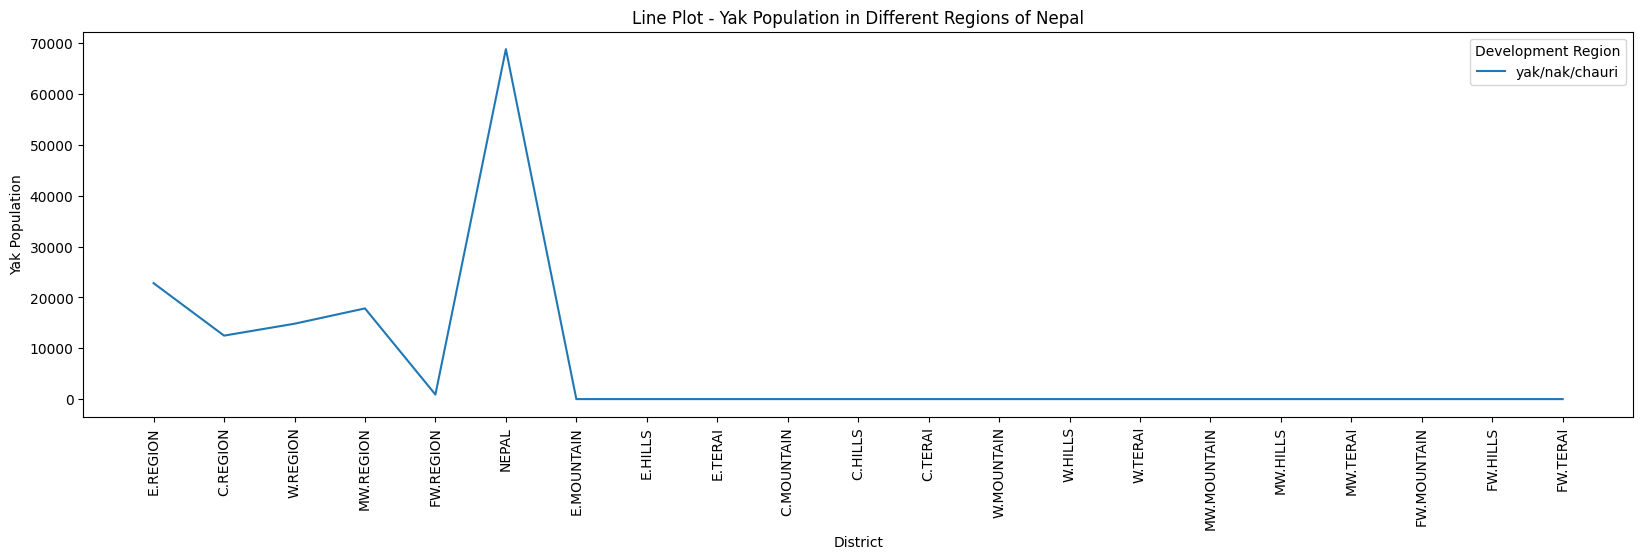

In [75]:
#yak population in regions
yak_Population = df_region[['district', 'yak/nak/chauri']]

yak_reshape = pd.melt(yak_Population, id_vars='district', value_name='Yak Population', var_name='Development Region')

plt.figure(figsize=(20, 5))

sns.lineplot(x='district', y='Yak Population', data=yak_reshape, hue='Development Region')

plt.title('Line Plot - Yak Population in Different Regions of Nepal')
plt.xlabel('District')
plt.ylabel('Yak Population')
plt.xticks(rotation=90)
plt.legend(title='Development Region')

plt.show()

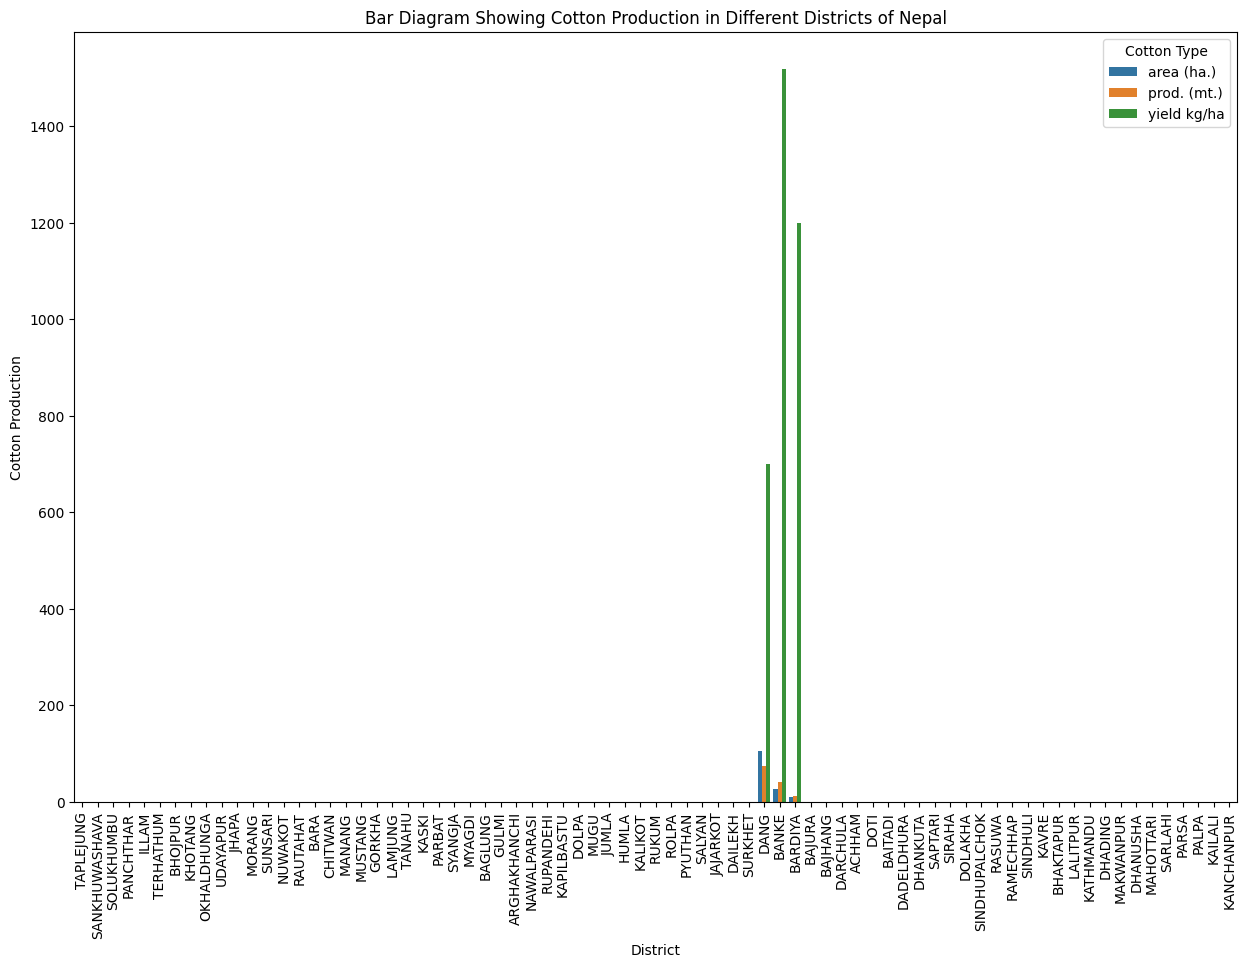

In [76]:
barplot_data = df_district[['district', 'area (ha.)', 'prod. (mt.)', 'yield kg/ha']]
included_districts = ['DANG', 'BANKE', 'BARDIYA']
filtered_data = boxplot_data[boxplot_data['district'].isin(included_districts)]

#reshape cotton
cotton_reshape = pd.melt(barplot_data, id_vars="district", value_name="Cotton Production", var_name="Cotton Type")

plt.figure(figsize=(15, 10))

sns.barplot(x="district", y="Cotton Production", data=cotton_reshape, hue="Cotton Type")

plt.title('Bar Diagram Showing Cotton Production in Different Districts of Nepal')
plt.xlabel('District')
plt.ylabel('Cotton Production')
plt.xticks(rotation=90)
plt.show()

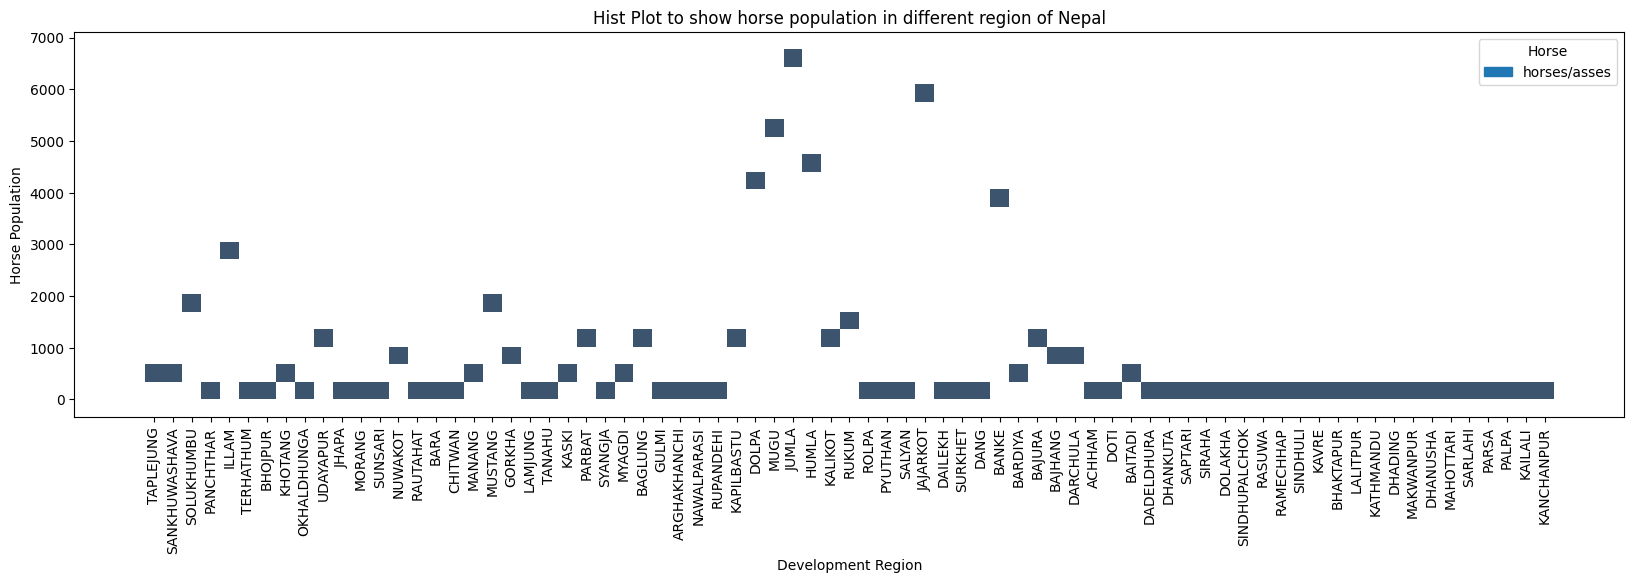

In [77]:
#horses popln in districts
horse_population = df_district[['district','horses/asses']]

horse_reshape= pd.melt(horse_population, id_vars="district",value_name="Horse Population",var_name="Horse")
plt.figure(figsize=(20,5))

sns.histplot(x="district", y="Horse Population", data= horse_reshape, hue="Horse")
plt.title('Hist Plot to show horse population in different region of Nepal')
plt.xlabel('Development Region')
plt.xticks(rotation=90)
plt.show()

In [78]:
bar_horse = px.bar(df_district, x='district', y='horses/asses',
                   title='Population of Horse/Asses',
                   labels={'horses/asses': 'Population'})
bar_rabbit = px.bar(df_district, x='district', y='rabbit',
                    title='Population of Rabbit',
                    labels={'rabbit': 'Population'})
bar_milk = px.bar(df_district, x='district', y=['milking  cows no.', 'milking  buffaloes no.'],
                  title='Production of Milk',
                  labels={'value': 'Production', 'variable': 'Milk Type'}, barmode='group')
bar_meat = px.bar(df_district, x='district', y='total meat',
                  title='Production of Meat',
                  labels={'total meat': 'Production'})
bar_wool = px.bar(df_district, x='district', y='sheep wool produced',
                  title='Production of Wool',
                  labels={'sheep wool produced': 'Production'})
bar_egg = px.bar(df_district, x='district', y=['hen egg', 'duck egg'],
                 title='Production of Egg',
                 labels={'value': 'Production', 'variable': 'Egg Type'}, barmode='group')
bar_cotton = px.bar(df_district, x='district', y='prod. (mt.)',
                    title='Production of Cotton',
                    labels={'prod. (mt.)': 'Production'})

bar_horse.show()
bar_rabbit.show()
bar_milk.show()
bar_meat.show()
bar_wool.show()
bar_egg.show()
bar_cotton.show()

#list and count

In [79]:
# average cows' milk production
avg_cow_milk = df_district['cow milk'].mean()

#more/equal of average
abv_avg_cow_milk = df_district[df_district['cow milk'] >= avg_cow_milk]

#list and count
district_abv_avg = abv_avg_cow_milk[['district']]
abv_avg_count = district_abv_avg.shape[0]

display(district_abv_avg.sample(9))

print("Sum Total Count:", abv_avg_count)

,district
43,SURKHET
73,KAILALI
4,ILLAM
16,CHITWAN
66,DHADING
44,DANG
31,KAPILBASTU
30,RUPANDEHI
15,BARA


Sum Total Count: 28


In [80]:
#average milk of cows and buffaloes
avg_milk_prod = df_district[['cow milk', 'buff milk']].sum(axis=1).mean()

#more/equal compared to average
abv_avg_milk = df_district[(df_district['cow milk'] + df_district['buff milk']) >= avg_milk_prod]

#list and count
district_abv_avg_milk = abv_avg_milk[['district']]
abv_avg_milk_count = district_abv_avg_milk.shape[0]

display(district_abv_avg_milk.sample(7))

print("Sum Total Count:", abv_avg_milk_count)

,district
29,NAWALPARASI
11,MORANG
68,DHANUSHA
66,DHADING
45,BANKE
69,MAHOTTARI
16,CHITWAN


Sum Total Count: 31


#dataset model: training, testing, evaluation

linear regression

In [81]:
#columns of test dataset model
egg_test_cols = ['laying hen', 'laying duck', 'hen egg', 'duck egg', 'total egg']

#columns with only sected dataframes
model_egg = df_district[egg_test_cols].copy()

#feature and target vairable
X = model_egg[['laying hen', 'laying duck', 'hen egg', 'duck egg']]
y = model_egg['total egg']

#split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
#testing set prediction
y_pred = model.predict(X_test)

#Mean Absolute Error (MAE) calulation
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

#Squared Error (MSE) calculation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

#Root Mean Squared Error (RMSE) calculation
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 9.276845958083867e-12
Mean Squared Error (MSE): 1.2660904003919068e-22
Root Mean Squared Error (RMSE): 1.1252068256067001e-11


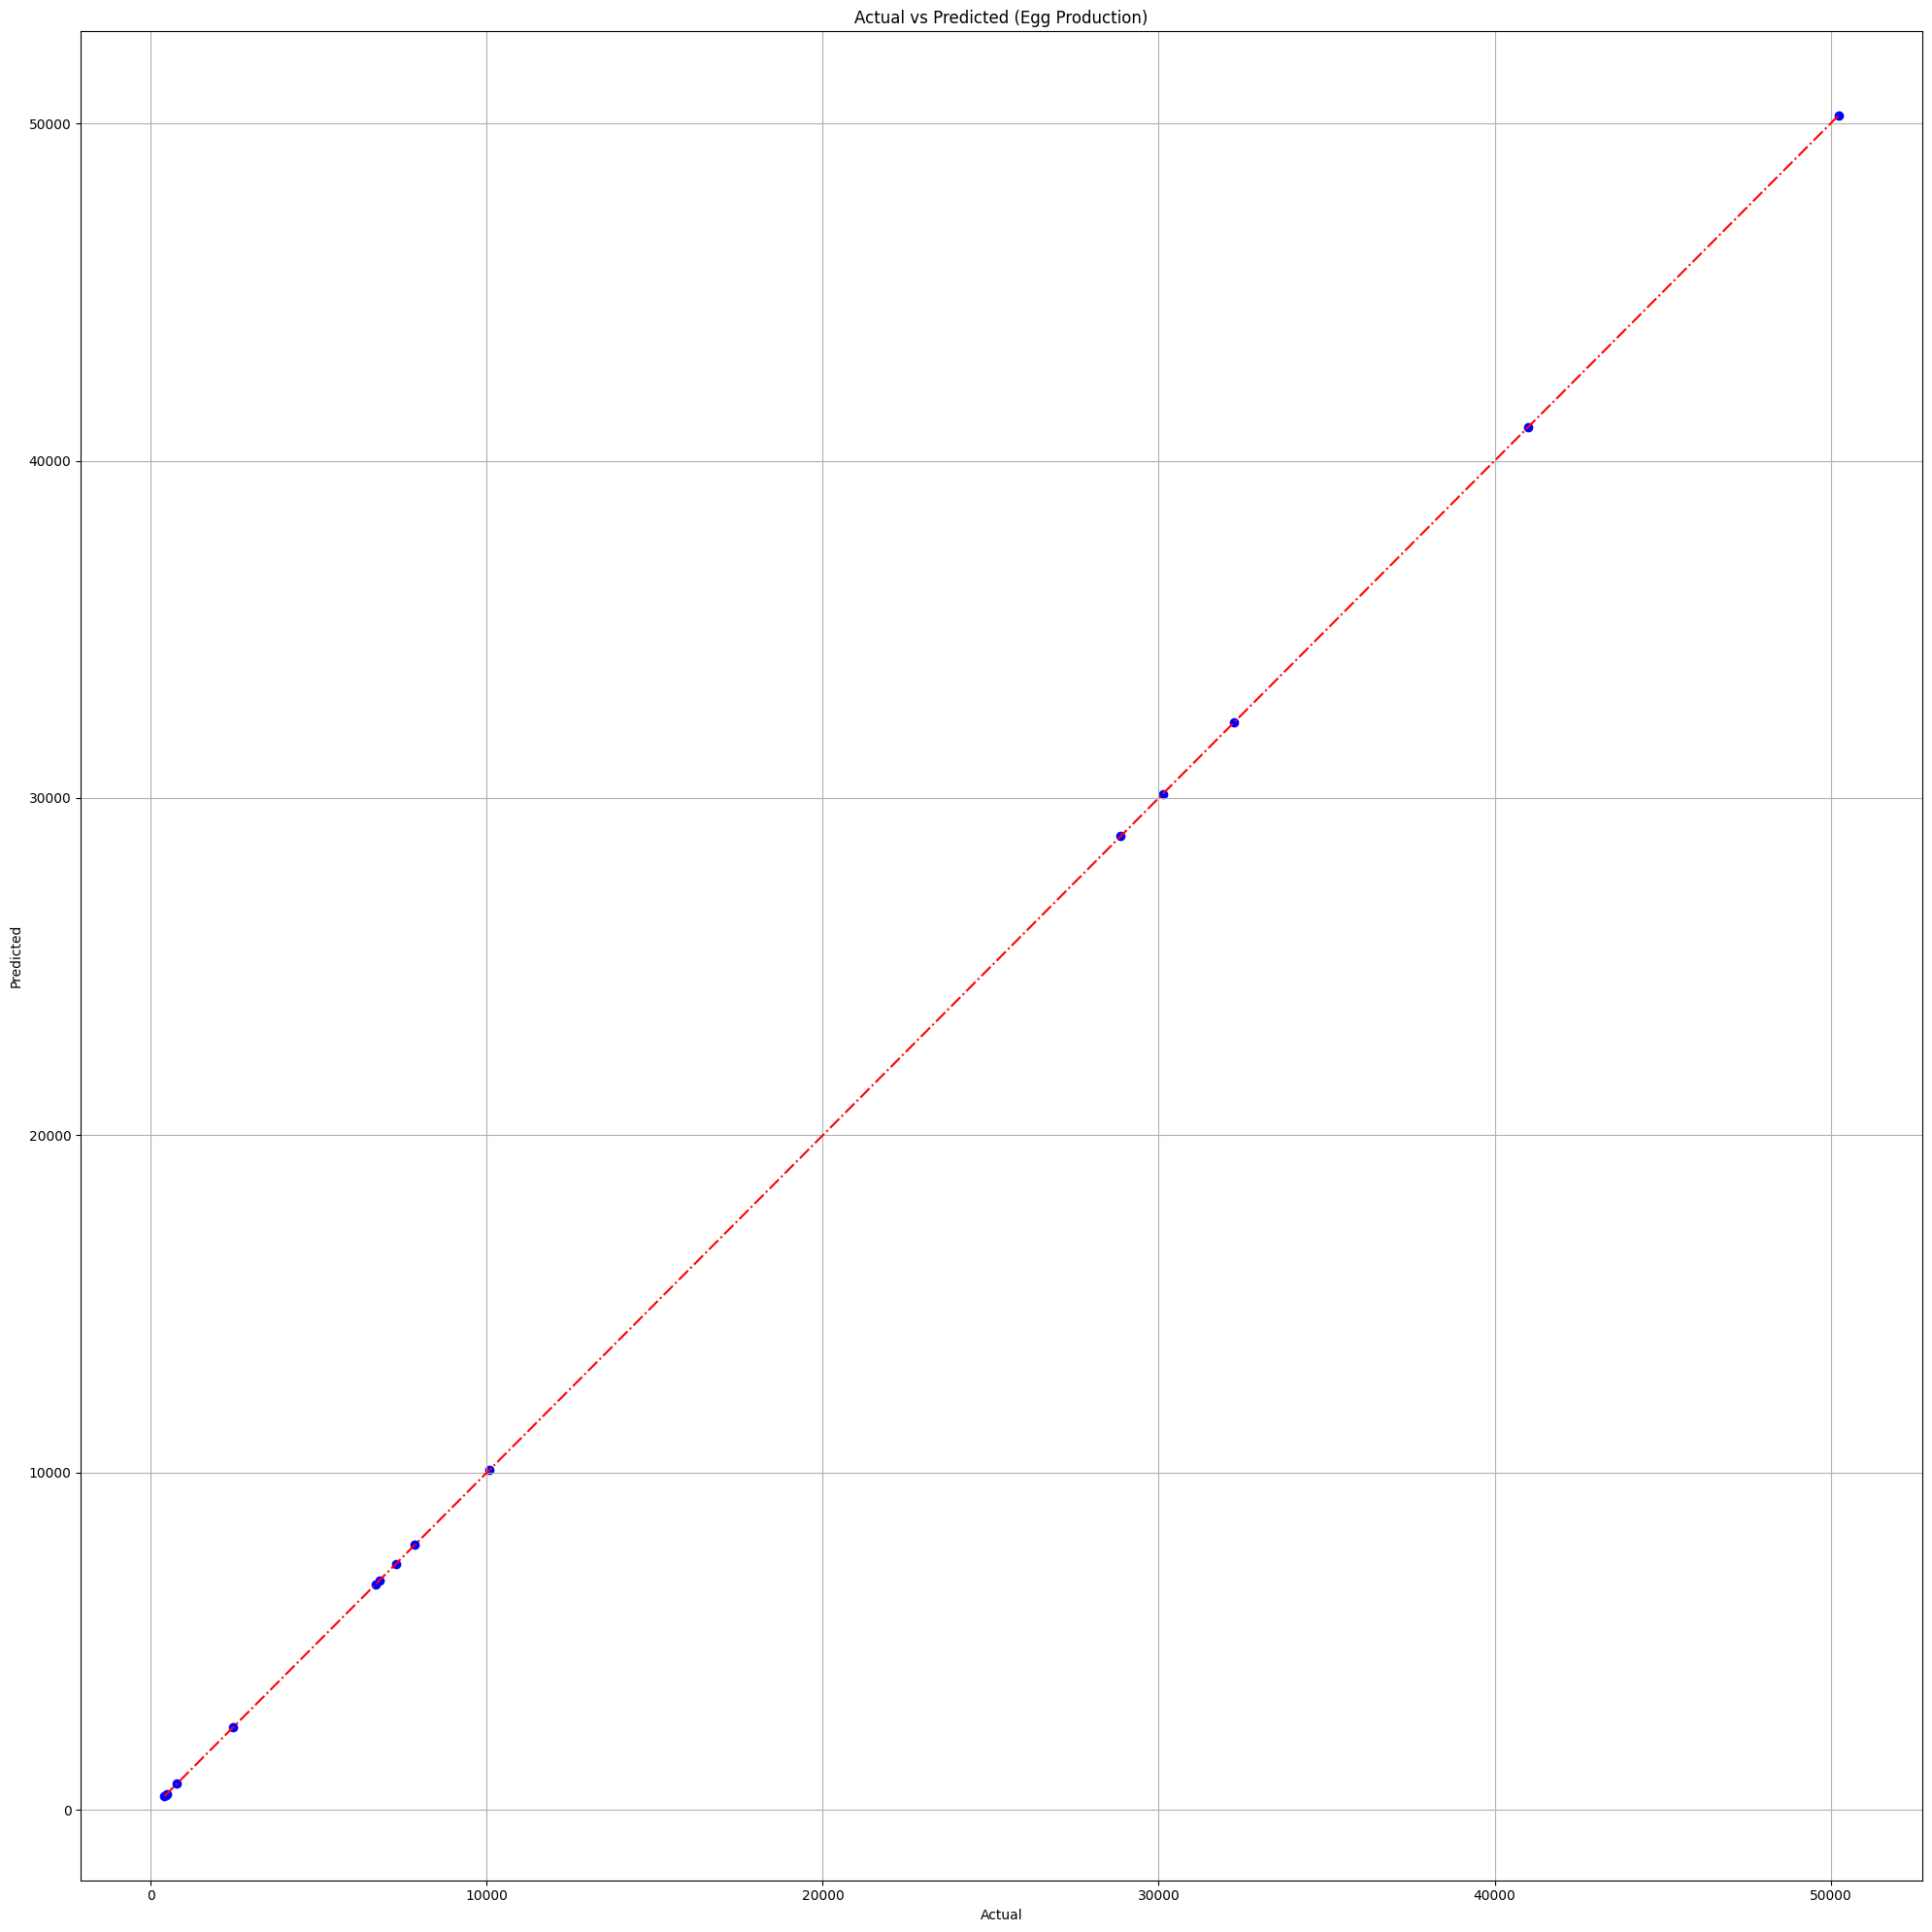

In [83]:
#actual vs prediction
plt.scatter(y_test, y_pred, color='blue')
#diagonal lines
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-.', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Egg Production)')
plt.grid(True)
plt.tight_layout()
plt.show()

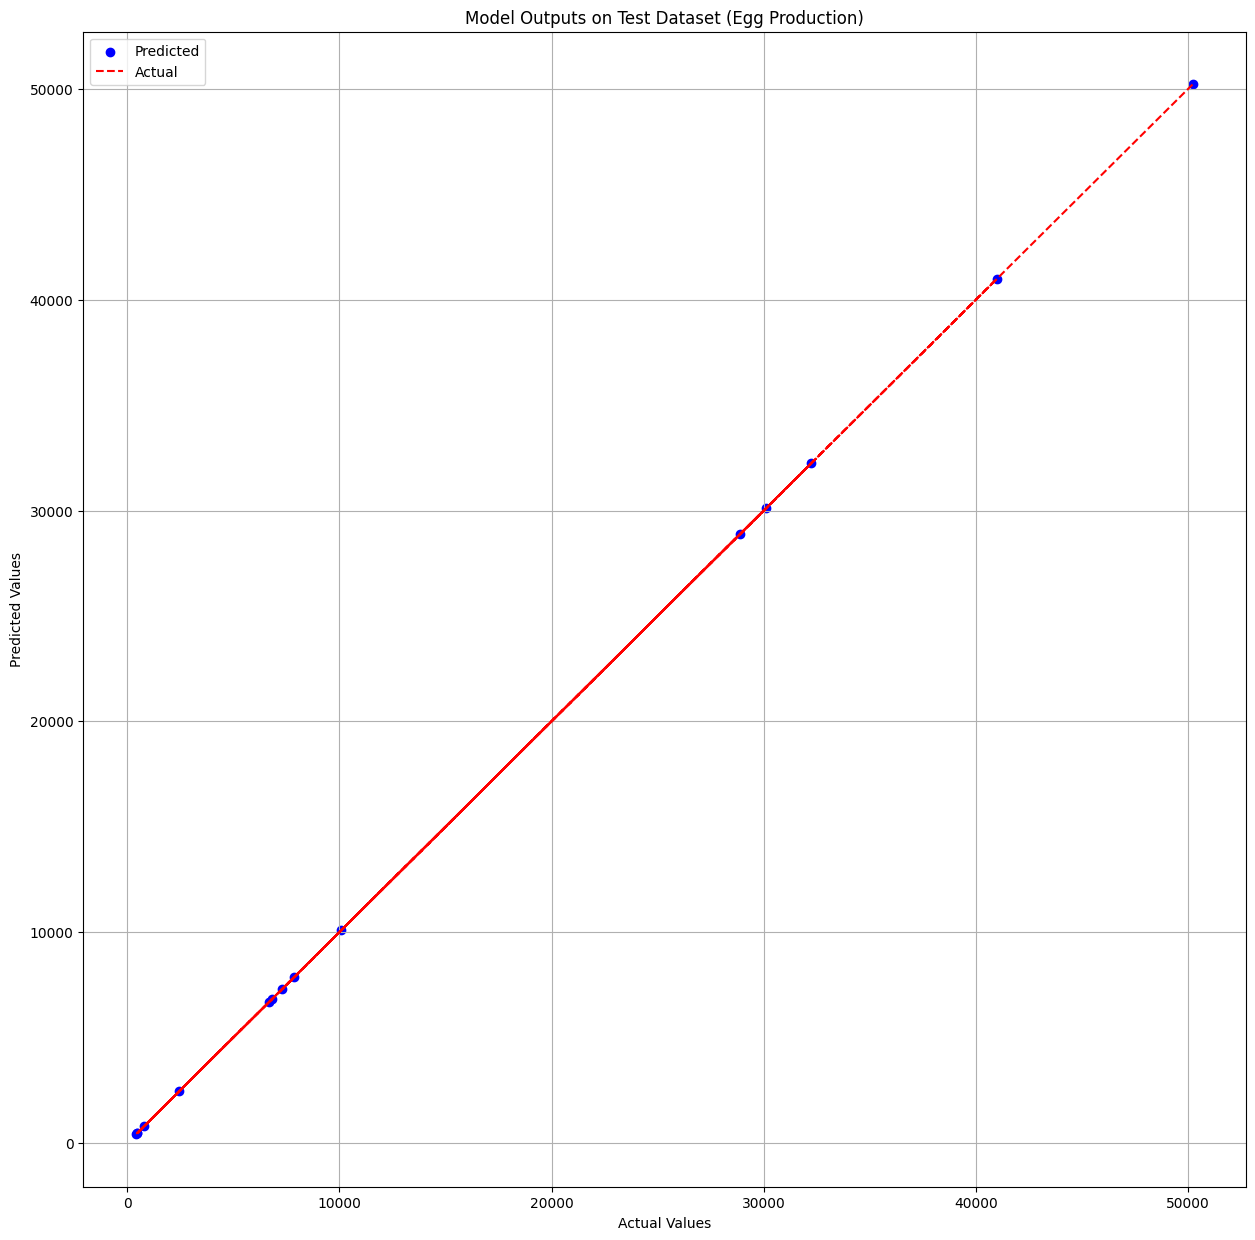

In [89]:
#predicted vs actual values
plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Actual')
plt.title('Model Outputs on Test Dataset (Egg Production)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

logistic regression

In [90]:
#test dataset columns of milk production model
milk_test_cols = ['milking  cows no.', 'milking  buffaloes no.', 'cow milk', 'buff milk', 'total milk produced']

#copy of dataframe and columns
model_milk = df_district[milk_test_cols].copy()

#creating label for discretize prediction column of milk production
model_milk['levels of production'] = pd.cut(model_milk['total milk produced'], bins=3, labels=['low', 'medium', 'high'])

#selection of target and feature variable
X = model_milk[['milking  cows no.', 'cow milk', 'milking  buffaloes no.', 'buff milk']]
y = model_milk['levels of production']

#split dataset into 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#start training of logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [91]:
#testing set prediction
y_pred = model.predict(X_test)

#model accuracy evaulation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n")

#classification report
print(classification_report(y_test, y_pred))
print("\n")

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8666666666666667


              precision    recall  f1-score   support

        high       0.50      1.00      0.67         1
         low       0.90      1.00      0.95         9
      medium       1.00      0.60      0.75         5

    accuracy                           0.87        15
   macro avg       0.80      0.87      0.79        15
weighted avg       0.91      0.87      0.86        15



Confusion Matrix:
[[1 0 0]
 [0 9 0]
 [1 1 3]]


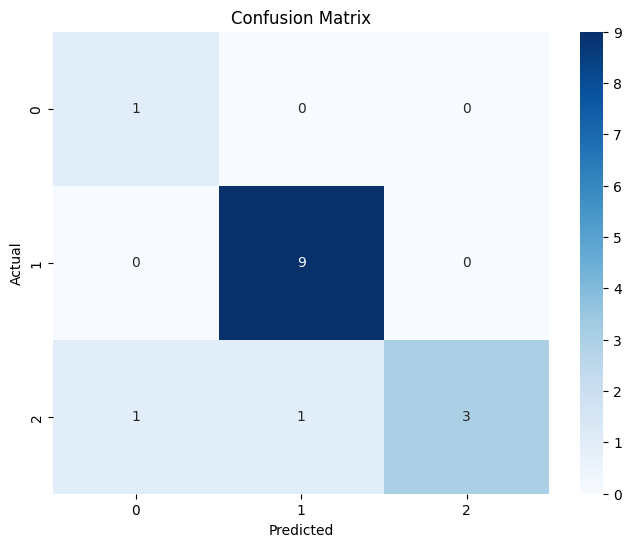

In [92]:
#confusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

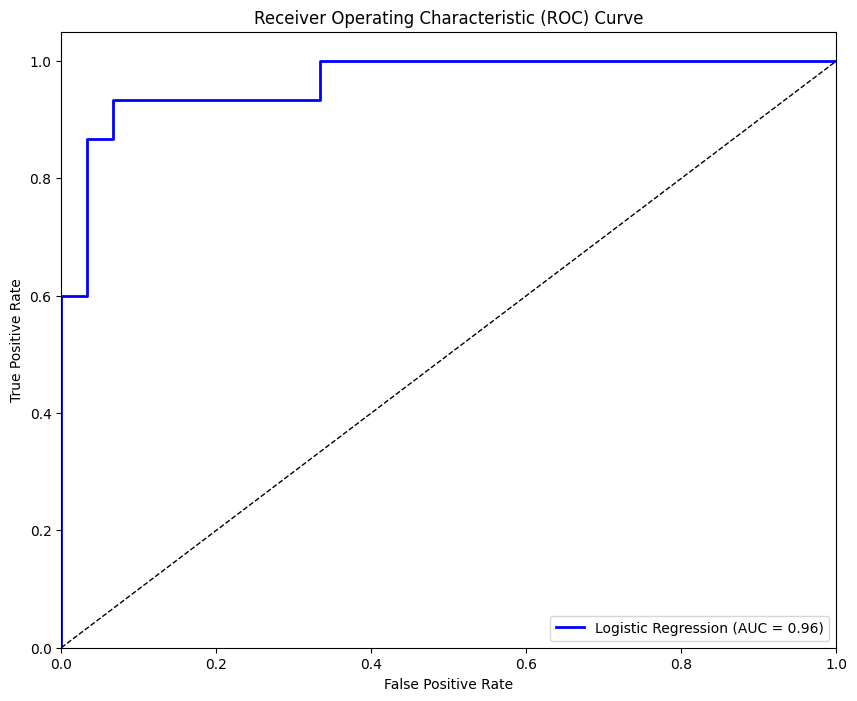

In [93]:
#logistic regression scores
logistic_scores = model.predict_proba(X_test)

#binarizing the target variable
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

#ROC curves plotting
plt.figure(figsize=(10, 8))

#logistic regression ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), logistic_scores.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)

#classifier line
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

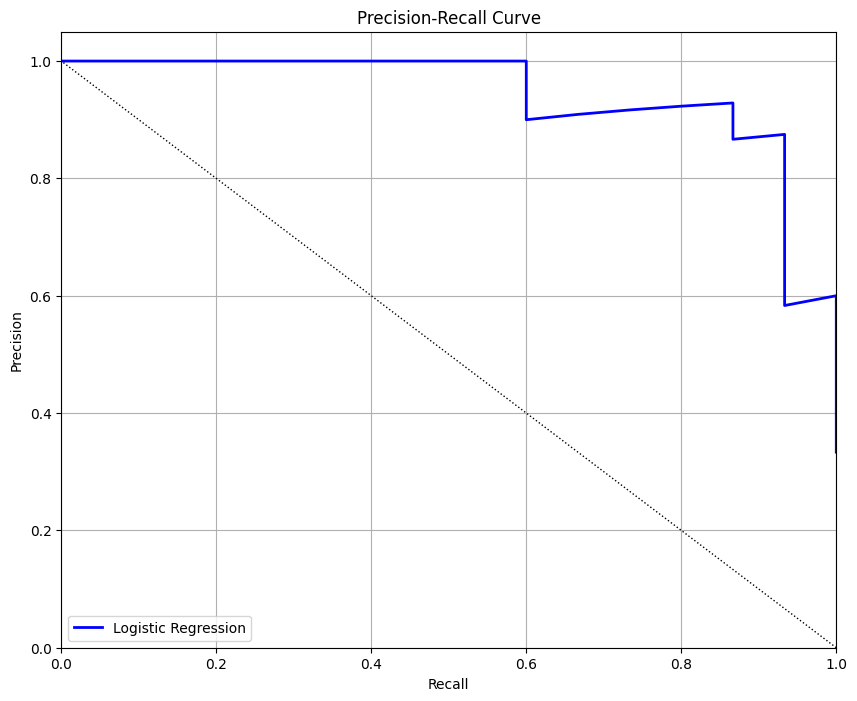

In [94]:
#precesiona and recall value
precision_lr, recall_lr, _ = precision_recall_curve(y_test_bin.ravel(), logistic_scores.ravel())

#precisiono-recall curve
plt.figure(figsize=(10, 8))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.plot([1, 0], [0, 1], color='black', lw=1, linestyle=':')
plt.grid(True)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#clean

In [95]:
#geographical regions seperated
df_region = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/all_region.csv')
#all district seperated
df_district = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/all_district.csv')

In [96]:
province_index = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/district_province.csv', index_col = ['province','district'])
pd.set_option('display.max.columns',75)
display(province_index.sort_index())

horses/asses  milking  cows no.  \
province          district                                         
(1) KOSHI         BHOJPUR               168.0              14103   
                  DHANKUTA                0.0              12523   
                  ILLAM                2815.0              26821   
                  JHAPA                  42.0              36068   
                  KHOTANG               350.0              12998   
                  MORANG                 47.0              56521   
                  OKHALDHUNGA           102.0               7930   
                  PANCHTHAR              15.0              14854   
                  SANKHUWASHAVA         358.0              15342   
                  SOLUKHUMBU           1775.0               7819   
                  SUNSARI                57.0              40311   
                  TAPLEJUNG             543.0               8123   
                  TERHATHUM              42.0              18880   
                  UDAYAPUR             1302.0              15867   
(2) MADHESH       BARA                  305.0              18771   
                  DHANUSHA                0.0              19150   
                  MAHOTTARI               0.0              16860   
                  PARSA                   0.0              11400   
                  RAUTAHAT              198.0              16493   
                  SAPTARI                 0.0              31790   
                  SARLAHI                 0.0              19221   
                  SIRAHA                  0.0              12434   
(3) BAGMATI       BHAKTAPUR               0.0               3402   
                  CHITWAN                15.0              14934   
                  DHADING                 0.0              24068   
                  DOLAKHA                 0.0              12344   
                  KATHMANDU               0.0               6573   
                  KAVRE                   0.0              20587   
                  LALITPUR                0.0               3319   
                  MAKWANPUR               0.0              18220   
                  NUWAKOT               950.0              21350   
                  RAMECHHAP               0.0              12255   
                  RASUWA                  0.0               1853   
                  SINDHULI                0.0              15745   
                  SINDHUPALCHOK           0.0               7183   
(4) GANDAKI       BAGLUNG              1250.0               8950   
                  GORKHA                854.0              14927   
                  KASKI                 381.0               8879   
                  LAMJUNG                21.0               4887   
                  MANANG                502.0                452   
                  MUSTANG              1856.0               1109   
                  MYAGDI                582.0               5562   
                  NAWALPARASI            16.0              25737   
                  PARBAT               1043.0               5655   
                  SYANGJA                17.0               5694   
                  TANAHU                 16.0              14942   
(5) LUMBINI       ARGHAKHANCHI           17.0               6219   
                  BANKE                3963.0              14060   
                  BARDIYA               559.0              15932   
                  DANG                  317.0              18630   
                  GULMI                  54.0               6860   
                  KAPILBASTU           1038.0              15319   
                  PALPA                   0.0              11434   
                  PYUTHAN                12.0               9641   
                  ROLPA                 129.0              14535   
                  RUKUM                1637.0               4910   
                  RUPANDEHI             142.0              17934   
(6) KARNALI       DAI

In [97]:
#save index province district as file
province_index.to_csv('/content/drive/MyDrive/mlpc/csv_files/clean/province_index.csv')

In [105]:
region_index = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/all_district.csv')

In [99]:
region_district = {
    '(1) KOSHI': {
        'Himalayan': ['TAPLEJUNG', 'SANKHUWASHAVA', 'SOLUKHUMBU'],
        'Hill': ['UDAYAPUR','PANCHTHAR', 'ILLAM', 'TERHATHUM', 'DHANKUTA', 'BHOJPUR', 'KHOTANG', 'OKHALDHUNGA'],
        'Terai': [ 'JHAPA', 'MORANG', 'SUNSARI']
    },
    '(2) MADHESH': {
        'Himalayan': [],
        'Hill': [],
        'Terai': ['MAHOTTARI', 'RAUTAHAT', 'DHANUSHA', 'SIRAHA', 'BARA', 'SARLAHI', 'PARSA', 'SAPTARI']
    },
    '(3) BAGMATI': {
        'Himalayan': ['DOLAKHA', 'SINDHUPALCHOK', 'RASUWA'],
        'Hill': ['MAKWANPUR','BHAKTAPUR', 'LALITPUR', 'KATHMANDU', 'NUWAKOT', 'RAMECHHAP', 'KAVRE', 'DHADING','SINDHULI'],
        'Terai': ['CHITWAN']
    },
    '(4) GANDAKI': {
        'Himalayan': ['MANANG', 'MUSTANG'],
        'Hill': ['PARBAT', 'SYANGJA', 'TANAHU', 'LAMJUNG', 'BAGLUNG', 'KASKI', 'MYAGDI', 'GORKHA'],
        'Terai': ['NAWALPARASI']
    },
    '(5) LUMBINI': {
        'Himalayan': [],
        'Hill': ['PALPA', 'ARGHAKHANCHI', 'RUKUM','GULMI', 'PYUTHAN', 'ROLPA'],
        'Terai': [ 'RUPANDEHI', 'KAPILBASTU', 'DANG', 'BANKE', 'BARDIYA']
    },
    '(6) KARNALI': {
        'Himalayan': ['DOLPA', 'MUGU', 'HUMLA', 'JUMLA'],
        'Hill': ['SALYAN', 'JAJARKOT', 'DAILEKH', 'SURKHET', 'KALIKOT'],
        'Terai': []
    },
    '(7) SUDUR PASCHIM': {
        'Himalayan': ['BAJURA', 'BAJHANG', 'DARCHULA'],
        'Hill': ['ACHHAM', 'DOTI', 'BAITADI', 'DADELDHURA'],
        'Terai': ['KAILALI', 'KANCHANPUR']
    }
}

In [100]:
# Function to map district to region
def map_district_to_region(district):
    for region, districts in region_district.items():
        for region_type, district_list in districts.items():
            if district in district_list:
                return region + ' - ' + region_type
    return None

# Add 'region' column to DataFrame
region_index['region'] = region_index['district'].apply(map_district_to_region)

In [101]:
region_index.to_csv('/content/drive/MyDrive/mlpc/csv_files/clean/region_index.csv')

In [102]:
region_index = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/region_index.csv', index_col = ['region','district'])
pd.set_option('display.max.columns',75)
display(region_index.sort_index())

Unnamed: 0  horses/asses  \
region                        district                                  
(1) KOSHI - Hill              BHOJPUR                 6         168.0   
                              DHANKUTA               54           0.0   
                              ILLAM                   4        2815.0   
                              KHOTANG                 7         350.0   
                              OKHALDHUNGA             8         102.0   
                              PANCHTHAR               3          15.0   
                              TERHATHUM               5          42.0   
                              UDAYAPUR                9        1302.0   
(1) KOSHI - Himalayan         SANKHUWASHAVA           1         358.0   
                              SOLUKHUMBU              2        1775.0   
                              TAPLEJUNG               0         543.0   
(1) KOSHI - Terai             JHAPA                  10          42.0   
                              MORANG                 11          47.0   
                              SUNSARI                12          57.0   
(2) MADHESH - Terai           BARA                   15         305.0   
                              DHANUSHA               68           0.0   
                              MAHOTTARI              69           0.0   
                              PARSA                  71           0.0   
                              RAUTAHAT               14         198.0   
                              SAPTARI                55           0.0   
                              SARLAHI                70           0.0   
                              SIRAHA                 56           0.0   
(3) BAGMATI - Hill            BHAKTAPUR              63           0.0   
                              DHADING                66           0.0   
                              KATHMANDU              65           0.0   
                              KAVRE                  62           0.0   
                              LALITPUR               64           0.0   
                              MAKWANPUR              67           0.0   
                              NUWAKOT                13         950.0   
                              RAMECHHAP              60           0.0   
                              SINDHULI               61           0.0   
(3) BAGMATI - Himalayan       DOLAKHA                57           0.0   
                              RASUWA                 59           0.0   
                              SINDHUPALCHOK          58           0.0   
(3) BAGMATI - Terai           CHITWAN                16          15.0   
(4) GANDAKI - Hill            BAGLUNG                26        1250.0   
                              GORKHA                 19         854.0   
                              KASKI                  22         381.0   
                              LAMJUNG                20          21.0   
                              MYAGDI                 25         582.0   
                              PARBAT                 23        1043.0   
                              SYANGJA                24          17.0   
                              TANAHU                 21          16.0   
(4) GANDAKI - Himalayan       MANANG                 17         502.0   
                              MUSTANG                18        1856.0   
(4) GANDAKI - Terai           NAWALPARASI            29          16.0   
(5) LUMBINI - Hill            ARGHAKHANCHI           28          17.0   
                              GULMI                  27          54.0   
                              PALPA                  72           0.0   
                              PYUTHAN                39          12.0   
                              ROLPA                  38         129.0   
                              RUKUM                  37        1637.0   
(5) LUMBINI - Terai           BANKE                  45        3963.0   
                              

In [103]:
#clean datasets
district_province = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/district_province.csv')
province_index = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/region_index.csv')
region_index = pd.read_csv('/content/drive/MyDrive/mlpc/csv_files/clean/province_index.csv')

#made by

In [104]:
my_details = {
    'full_name': 'Sujal Ratna Tuldahr',
    'student_id': '22013 230',
    'university_id': '036 2483',
    'course_name': 'Machine Learning and Parallel Computing',
    'course_code': 'ITS 66604',
    'year_semester': 'Year2 | Semester 4',
    'assignment': 'Individual'
}

print("Full Name:         ", my_details['full_name'])
print("Student ID:        ", my_details['student_id'])
print("University ID:     ", my_details['university_id'])
print("Course Name:       ", my_details['course_name'])
print("Year | Semester:   ", my_details['year_semester'])
print("Assignment:        ", my_details['assignment'])

Full Name:          Sujal Ratna Tuldahr
Student ID:         22013 230
University ID:      036 2483
Course Name:        Machine Learning and Parallel Computing
Year | Semester:    Year2 | Semester 4
Assignment:         Individual
